In [ ]:
# CELDA_0
!pip install trimesh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 736.5/736.5 kB 14.0 MB/s eta 0:00:00


<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1337031507.py:21: SyntaxWarning: invalid escape sequence '\s'
  df_antenas = pd.read_csv(csv_filename, sep='\s+', header=None,


PROCESAMIENTO DE DATOS DE ANTENAS

1. Cargando CSV de antenas...


Saving PUIG_DEL_REY_ANTENAS.csv to PUIG_DEL_REY_ANTENAS.csv
   ✓ Cargados 369437 puntos
   ✓ Familias encontradas: [np.float64(0.0), np.float64(1.0), np.float64(3.0), np.float64(4.0), np.float64(6.0)]
   ✓ Ejemplares por familia:
      - Familia 0.0: 2 ejemplares
      - Familia 1.0: 7 ejemplares
      - Familia 3.0: 2 ejemplares
      - Familia 4.0: 6 ejemplares
      - Familia 6.0: 9 ejemplares

2. Cargando Excel con punto base...


Saving punto_base (1).xlsx to punto_base (1).xlsx
   ✓ Punto base: X=408956.29, Y=4649198.16, Z=716.95

3. Transformando coordenadas...
   ✓ Coordenadas transformadas
   ✓ Rango X: [-2.73, 2.29]
   ✓ Rango Y: [-1.72, 1.91]
   ✓ Rango Z: [8.02, 31.62]

4. Agrupando datos por Familia y Ejemplar...
   ✓ Total de grupos (Familia-Ejemplar): 26
   ✓ Familia 0.0: 2 ejemplares
   ✓ Familia 1.0: 7 ejemplares
   ✓ Familia 3.0: 2 ejemplares
   ✓ Familia 4.0: 6 ejemplares
   ✓ Familia 6.0: 9 ejemplares

5. Generando visualización 3D...


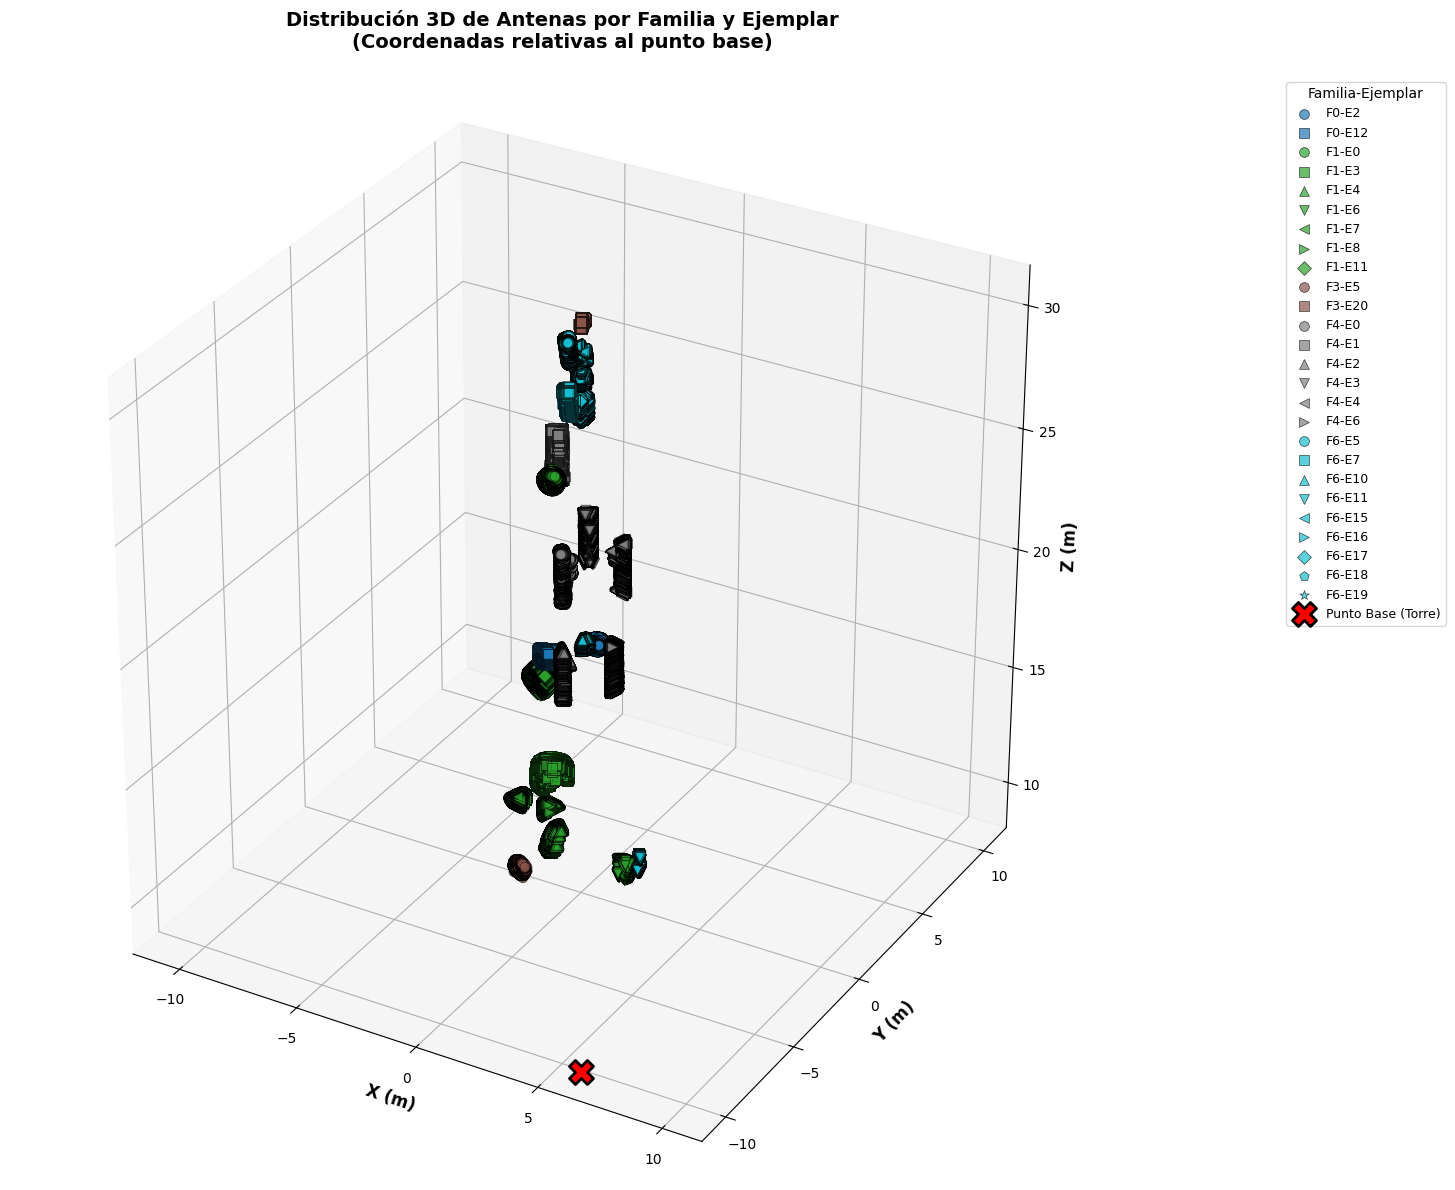

   ✓ Visualización completada

RESUMEN ESTADÍSTICO

Familia 0:
  Ejemplar 2:
    - Número de puntos: 6722
    - Centro (X,Y,Z): (-0.01, 1.21, 18.03)
    - Altura relativa: 18.03 m
  Ejemplar 12:
    - Número de puntos: 10519
    - Centro (X,Y,Z): (-1.32, -0.25, 17.97)
    - Altura relativa: 17.97 m

Familia 1:
  Ejemplar 0:
    - Número de puntos: 19228
    - Centro (X,Y,Z): (-0.41, -1.36, 25.94)
    - Altura relativa: 25.94 m
  Ejemplar 3:
    - Número de puntos: 19852
    - Centro (X,Y,Z): (-2.13, 1.24, 12.01)
    - Altura relativa: 12.01 m
  Ejemplar 4:
    - Número de puntos: 9466
    - Centro (X,Y,Z): (-2.05, 1.34, 9.06)
    - Altura relativa: 9.06 m
  Ejemplar 6:
    - Número de puntos: 5496
    - Centro (X,Y,Z): (1.00, 1.62, 8.54)
    - Altura relativa: 8.54 m
  Ejemplar 7:
    - Número de puntos: 8028
    - Centro (X,Y,Z): (-2.39, -0.58, 11.68)
    - Altura relativa: 11.68 m
  Ejemplar 8:
    - Número de puntos: 4428
    - Centro (X,Y,Z): (-2.00, 1.03, 10.55)
    - Altura relat

In [ ]:
#CELDA_1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files

# ============================================================================
# 1. CARGAR DATOS
# ============================================================================

print("=" * 60)
print("PROCESAMIENTO DE DATOS DE ANTENAS")
print("=" * 60)

# Cargar el CSV con los datos de las antenas
print("\n1. Cargando CSV de antenas...")
uploaded_csv = files.upload()
csv_filename = list(uploaded_csv.keys())[0]

# Leer el CSV (sin encabezado, separado por espacios)
df_antenas = pd.read_csv(csv_filename, sep='\s+', header=None,
                         names=['X', 'Y', 'Z', 'R', 'G', 'B', 'Ejemplar', 'Familia'])

print(f"   ✓ Cargados {len(df_antenas)} puntos")
print(f"   ✓ Familias encontradas: {sorted(df_antenas['Familia'].unique())}")
print(f"   ✓ Ejemplares por familia:")
for familia in sorted(df_antenas['Familia'].unique()):
    ejemplares = df_antenas[df_antenas['Familia'] == familia]['Ejemplar'].unique()
    print(f"      - Familia {familia}: {len(ejemplares)} ejemplares")

# Cargar el Excel con el punto base
print("\n2. Cargando Excel con punto base...")
uploaded_excel = files.upload()
excel_filename = list(uploaded_excel.keys())[0]

# Leer el punto base (asumiendo que está en la primera fila)
df_base = pd.read_excel(excel_filename)
punto_base = df_base.iloc[0, :3].values  # Primeras 3 columnas de la primera fila

print(f"   ✓ Punto base: X={punto_base[0]:.2f}, Y={punto_base[1]:.2f}, Z={punto_base[2]:.2f}")

# ============================================================================
# 2. TRANSFORMAR COORDENADAS
# ============================================================================

print("\n3. Transformando coordenadas...")
# Restar el punto base de todas las coordenadas
df_antenas['X_rel'] = df_antenas['X'] - punto_base[0]
df_antenas['Y_rel'] = df_antenas['Y'] - punto_base[1]
df_antenas['Z_rel'] = df_antenas['Z'] - punto_base[2]

print(f"   ✓ Coordenadas transformadas")
print(f"   ✓ Rango X: [{df_antenas['X_rel'].min():.2f}, {df_antenas['X_rel'].max():.2f}]")
print(f"   ✓ Rango Y: [{df_antenas['Y_rel'].min():.2f}, {df_antenas['Y_rel'].max():.2f}]")
print(f"   ✓ Rango Z: [{df_antenas['Z_rel'].min():.2f}, {df_antenas['Z_rel'].max():.2f}]")

# ============================================================================
# 3. AGRUPAR DATOS
# ============================================================================

print("\n4. Agrupando datos por Familia y Ejemplar...")
# Agrupar por Familia y Ejemplar
grupos = df_antenas.groupby(['Familia', 'Ejemplar'])

print(f"   ✓ Total de grupos (Familia-Ejemplar): {len(grupos)}")

# Crear un diccionario con la información agrupada
datos_agrupados = {}
for (familia, ejemplar), grupo in grupos:
    if familia not in datos_agrupados:
        datos_agrupados[familia] = {}
    datos_agrupados[familia][ejemplar] = grupo

# Mostrar resumen de agrupación
for familia in sorted(datos_agrupados.keys()):
    print(f"   ✓ Familia {familia}: {len(datos_agrupados[familia])} ejemplares")

# ============================================================================
# 4. VISUALIZACIÓN 3D
# ============================================================================

print("\n5. Generando visualización 3D...")

# Crear figura con tamaño adecuado
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Generar colores para cada familia
familias = sorted(df_antenas['Familia'].unique())
colores_familia = plt.cm.tab10(np.linspace(0, 1, len(familias)))
mapa_colores = {familia: colores_familia[i] for i, familia in enumerate(familias)}

# Generar marcadores para diferentes ejemplares
marcadores = ['o', 's', '^', 'v', '<', '>', 'D', 'p', '*', 'h']

# Plotear cada grupo
for familia in sorted(datos_agrupados.keys()):
    ejemplares_familia = sorted(datos_agrupados[familia].keys())
    for idx, ejemplar in enumerate(ejemplares_familia):
        grupo = datos_agrupados[familia][ejemplar]

        # Seleccionar marcador (rotar si hay más ejemplares que marcadores)
        marcador = marcadores[idx % len(marcadores)]

        ax.scatter(grupo['X_rel'], grupo['Y_rel'], grupo['Z_rel'],
                  c=[mapa_colores[familia]],
                  marker=marcador,
                  s=50,
                  alpha=0.7,
                  label=f'F{int(familia)}-E{int(ejemplar)}',
                  edgecolors='black',
                  linewidth=0.5)

# Plotear el punto base (origen)
ax.scatter([0], [0], [0], c='red', marker='X', s=300,
          label='Punto Base (Torre)', edgecolors='black', linewidth=2)

# Configurar ejes proporcionados
ax.set_xlabel('X (m)', fontsize=12, fontweight='bold')
ax.set_ylabel('Y (m)', fontsize=12, fontweight='bold')
ax.set_zlabel('Z (m)', fontsize=12, fontweight='bold')

# Hacer que los ejes tengan la misma escala
max_range = np.array([
    df_antenas['X_rel'].max() - df_antenas['X_rel'].min(),
    df_antenas['Y_rel'].max() - df_antenas['Y_rel'].min(),
    df_antenas['Z_rel'].max() - df_antenas['Z_rel'].min()
]).max() / 2.0

mid_x = (df_antenas['X_rel'].max() + df_antenas['X_rel'].min()) * 0.5
mid_y = (df_antenas['Y_rel'].max() + df_antenas['Y_rel'].min()) * 0.5
mid_z = (df_antenas['Z_rel'].max() + df_antenas['Z_rel'].min()) * 0.5

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# Ajustar aspecto para proporciones correctas
ax.set_box_aspect([1, 1, 1])

# Título y leyenda
ax.set_title('Distribución 3D de Antenas por Familia y Ejemplar\n(Coordenadas relativas al punto base)',
            fontsize=14, fontweight='bold', pad=20)

# Leyenda fuera del gráfico
ax.legend(bbox_to_anchor=(1.15, 1), loc='upper left', fontsize=9,
         title='Familia-Ejemplar', title_fontsize=10)

# Grid
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("   ✓ Visualización completada")

# ============================================================================
# 5. ESTADÍSTICAS FINALES
# ============================================================================

print("\n" + "=" * 60)
print("RESUMEN ESTADÍSTICO")
print("=" * 60)

for familia in sorted(datos_agrupados.keys()):
    print(f"\nFamilia {int(familia)}:")
    for ejemplar in sorted(datos_agrupados[familia].keys()):
        grupo = datos_agrupados[familia][ejemplar]
        print(f"  Ejemplar {int(ejemplar)}:")
        print(f"    - Número de puntos: {len(grupo)}")
        print(f"    - Centro (X,Y,Z): ({grupo['X_rel'].mean():.2f}, "
              f"{grupo['Y_rel'].mean():.2f}, {grupo['Z_rel'].mean():.2f})")
        print(f"    - Altura relativa: {grupo['Z_rel'].mean():.2f} m")

print("\n" + "=" * 60)
print("PROCESO COMPLETADO")
print("=" * 60)


ANÁLISIS DETALLADO POR FAMILIA

Familias disponibles:
  [0] Familia 0: 2 ejemplares, 17241 puntos
  [1] Familia 1: 7 ejemplares, 86812 puntos
  [2] Familia 3: 2 ejemplares, 7572 puntos
  [3] Familia 4: 6 ejemplares, 178528 puntos
  [4] Familia 6: 9 ejemplares, 79284 puntos

¿Qué familia deseas procesar? [índice]: 3

✓ Familia 4 seleccionada
✓ Ejemplares en esta familia: [0, 1, 2, 3, 4, 6]

PROCESAMIENTO DE EJEMPLARES

--- Ejemplar 0 ---
  Puntos originales: 36739
  Puntos tras limpieza: 36738 (eliminados: 1)
  Bounding Box (OBB con PCA):
    - Dimensión en eje principal 1: 2.142 m
    - Dimensión en eje principal 2: 0.470 m
    - Dimensión en eje principal 3: 0.565 m
    - Volumen: 0.569 m³
  Filtrado: 4 caras laterales de 6 totales
    ✗ Cara -X excluida (|normal.z|=1.000 > 0.7)
    ✗ Cara +X excluida (|normal.z|=1.000 > 0.7)
  Candidatas: -Z (dist=1.59m), +Y (dist=1.51m)
    -Z: 23353 puntos cercanos (< 0.1m)
    +Y: 13652 puntos cercanos (< 0.1m)
  ✓ Cara seleccionada: -Z (23353 pu

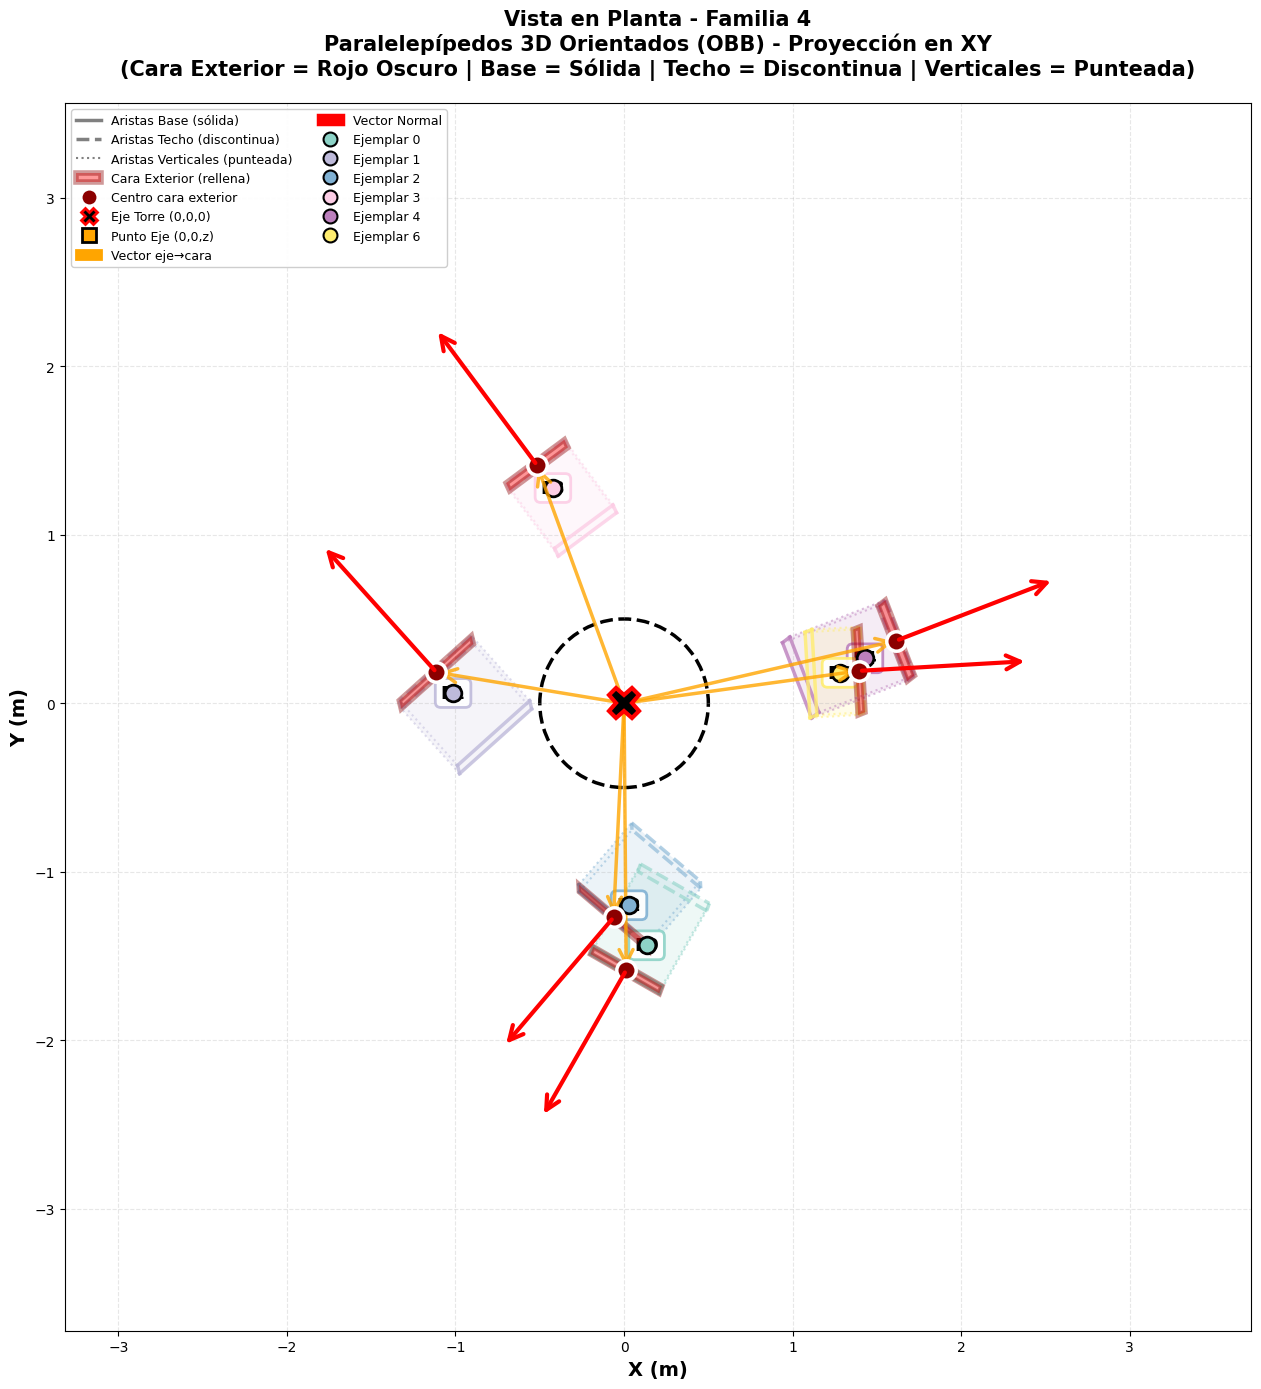

✓ Visualización general completada

GENERANDO VISUALIZACIONES INDIVIDUALES POR EJEMPLAR


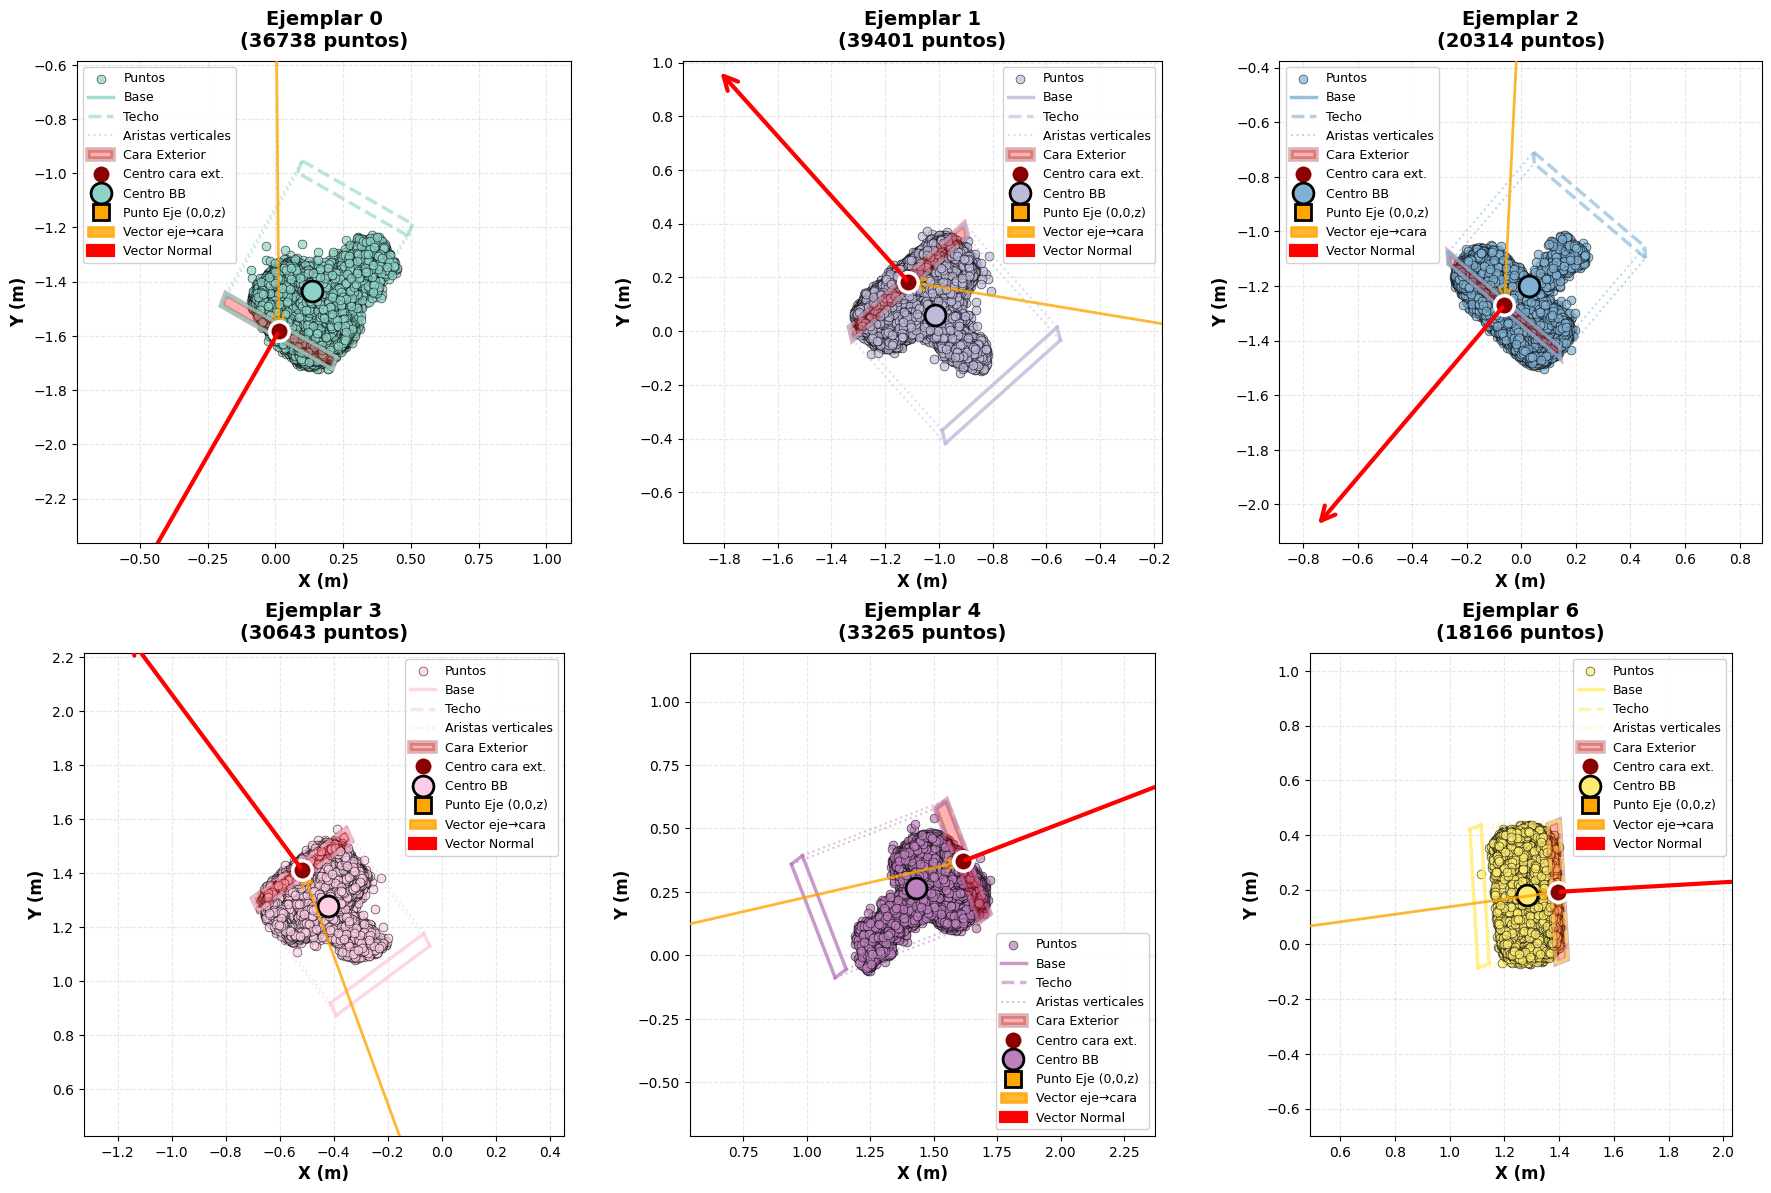

✓ 6 visualizaciones individuales completadas

Generando visualización 3D de bounding boxes...


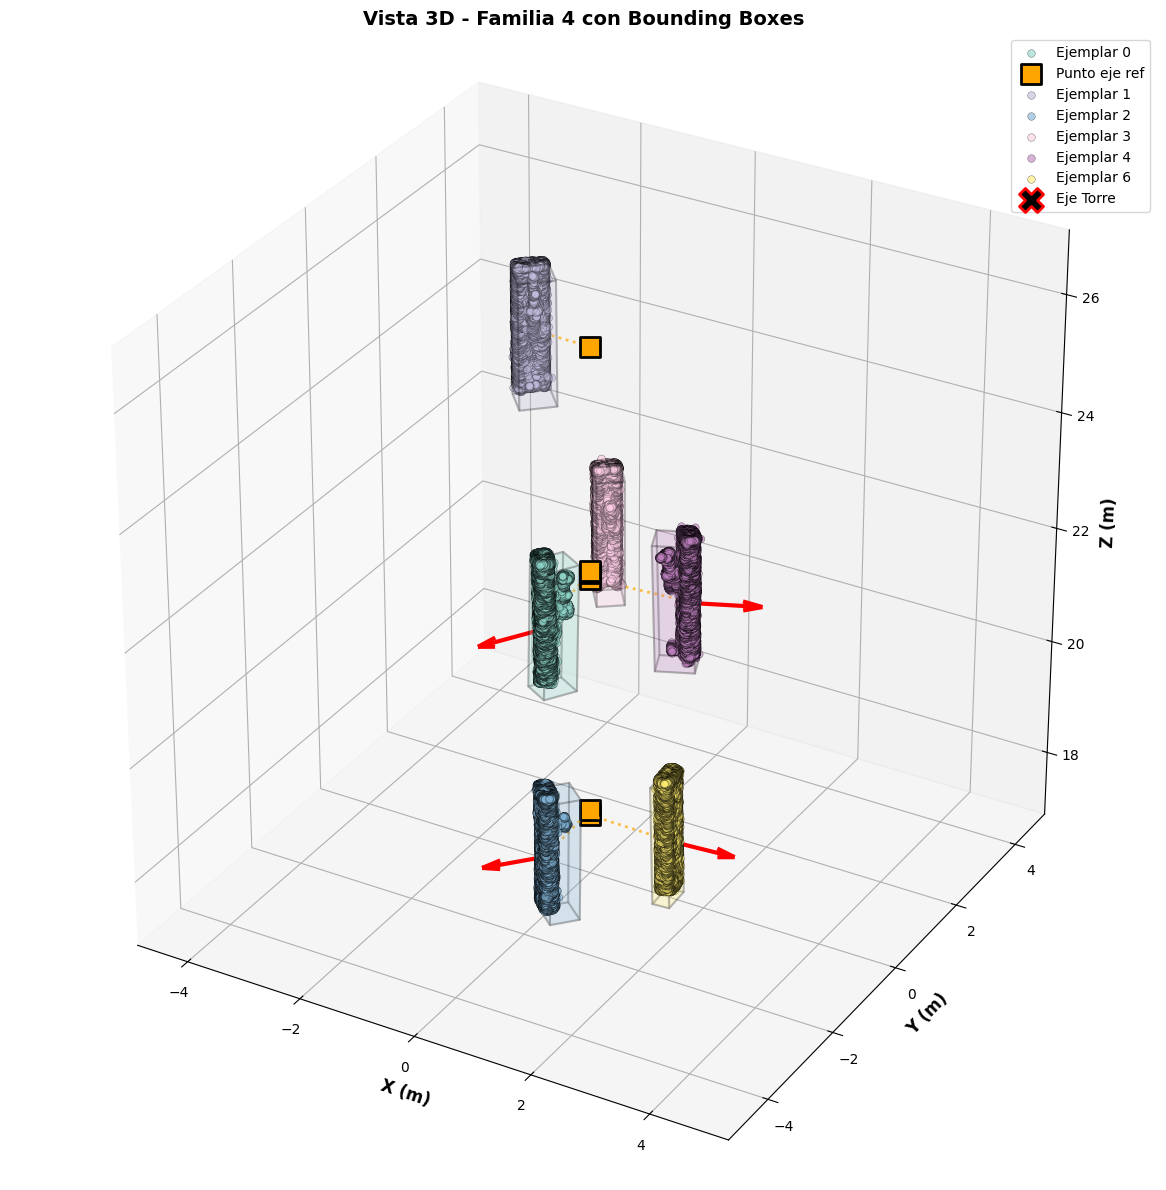

✓ Visualización 3D completada

EXPORTANDO RESULTADOS A EXCEL PARA DYNAMO

✓ Excel exportado: resultados_bbox_para_dynamo.xlsx
  - Hoja 'Resumen': 6 ejemplares
  - Hoja 'Vertices_BB': 48 vértices
  - Hoja 'Caras_Exteriores': 6 caras
  - Hoja 'Vertices_Cara_Exterior': 24 vértices

ANÁLISIS COMPLETADO
✓ Archivo Excel para Dynamo: resultados_bbox_para_dynamo.xlsx

📋 Para usar en Dynamo/Revit:
  1. Abrir Dynamo
  2. Crear nodo 'Python Script'
  3. Copiar código de 'nodo_dynamo_leer_excel.py'
  4. Conectar ruta del Excel como input


In [ ]:
#_CELDA_2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull

# ============================================================================
# SELECCIÓN DE FAMILIA
# ============================================================================

print("\n" + "=" * 60)
print("ANÁLISIS DETALLADO POR FAMILIA")
print("=" * 60)

familias_disponibles = sorted(df_antenas['Familia'].unique())
print("\nFamilias disponibles:")
for i, familia in enumerate(familias_disponibles):
    n_ejemplares = len(df_antenas[df_antenas['Familia'] == familia]['Ejemplar'].unique())
    n_puntos = len(df_antenas[df_antenas['Familia'] == familia])
    print(f"  [{i}] Familia {int(familia)}: {n_ejemplares} ejemplares, {n_puntos} puntos")

familia_idx = int(input("\n¿Qué familia deseas procesar? [índice]: "))
familia_seleccionada = familias_disponibles[familia_idx]

print(f"\n✓ Familia {int(familia_seleccionada)} seleccionada")

# Filtrar datos de la familia seleccionada
df_familia = df_antenas[df_antenas['Familia'] == familia_seleccionada].copy()
ejemplares = sorted(df_familia['Ejemplar'].unique())

print(f"✓ Ejemplares en esta familia: {[int(e) for e in ejemplares]}")

# ============================================================================
# FUNCIONES AUXILIARES
# ============================================================================

def limpiar_outliers(puntos, std_threshold=2.5):
    """Elimina outliers usando desviación estándar"""
    if len(puntos) < 4:
        return puntos

    centro = np.mean(puntos, axis=0)
    distancias = np.linalg.norm(puntos - centro, axis=1)

    media_dist = np.mean(distancias)
    std_dist = np.std(distancias)

    mask = distancias < (media_dist + std_threshold * std_dist)
    return puntos[mask]

def calcular_bounding_box(puntos):
    """
    Calcula el Oriented Bounding Box (OBB) - un paralelepípedo 3D orientado
    que se ajusta mínimamente a la geometría de los puntos usando PCA.

    El OBB está orientado según los ejes principales de variación de los puntos,
    lo que resulta en un volumen más ajustado que un bounding box alineado a los ejes.

    MÉTODO: PCA con sklearn (rápido y preciso)

    Retorna:
        dict con:
        - centro: punto central del paralelepípedo (centro geométrico correcto)
        - dimensiones: [largo, ancho, alto] en los ejes principales
        - ejes: matriz 3x3 con los vectores de los ejes principales
        - min_coords, max_coords: límites en el sistema de coordenadas local
    """
    from sklearn.decomposition import PCA

    # 1. Centrar puntos
    centroide = np.mean(puntos, axis=0)
    puntos_centrados = puntos - centroide

    # 2. PCA para encontrar los ejes principales
    pca = PCA(n_components=3)
    pca.fit(puntos_centrados)

    # Los componentes están ordenados por varianza descendente (mayor a menor)
    # pca.components_ tiene forma (3, 3) donde cada fila es un eje principal
    eigenvectors = pca.components_

    # 3. Proyectar puntos en los ejes principales
    # Necesitamos transponer porque eigenvectors tiene ejes como filas
    puntos_rotados = puntos_centrados @ eigenvectors.T

    # 4. Calcular dimensiones del paralelepípedo en el sistema de ejes principales
    min_coords = np.min(puntos_rotados, axis=0)
    max_coords = np.max(puntos_rotados, axis=0)
    dimensiones = max_coords - min_coords

    # 5. IMPORTANTE: Calcular el centro GEOMÉTRICO del BB (no asumir que es el centroide)
    # El BB puede estar descentrado respecto al centroide si los puntos son asimétricos
    centro_box_rotado = (min_coords + max_coords) / 2

    # 6. Transformar el centro del BB de coordenadas locales a globales
    centro_box = centroide + centro_box_rotado @ eigenvectors

    # 7. Calcular volumen
    volumen = np.prod(dimensiones)

    return {
        'centro': centro_box,
        'dimensiones': dimensiones,
        'ejes': eigenvectors.T,  # Transponer para que sean columnas (formato original)
        'min_coords': min_coords,
        'max_coords': max_coords,
        'volumen': volumen
    }

def obtener_vertices_box(bb_info):
    """
    Obtiene los 8 vértices del bounding box (paralelepípedo 3D orientado).

    Los vértices están organizados así:
    - Vértices 0-3: Base inferior (Z mínima)
    - Vértices 4-7: Techo superior (Z máxima)

    El bounding box está orientado según los ejes principales de PCA,
    por lo que es un paralelepípedo que se ajusta a la geometría de los puntos.
    """
    d = bb_info['dimensiones']
    min_c = bb_info['min_coords']

    # 8 vértices del box en coordenadas locales (sistema de ejes principales)
    # Orden: base (4 vértices) + techo (4 vértices)
    vertices_locales = np.array([
        # Base inferior (Z mínima)
        [min_c[0], min_c[1], min_c[2]],                      # 0: esquina (-X, -Y, -Z)
        [min_c[0] + d[0], min_c[1], min_c[2]],               # 1: esquina (+X, -Y, -Z)
        [min_c[0] + d[0], min_c[1] + d[1], min_c[2]],        # 2: esquina (+X, +Y, -Z)
        [min_c[0], min_c[1] + d[1], min_c[2]],               # 3: esquina (-X, +Y, -Z)
        # Techo superior (Z máxima)
        [min_c[0], min_c[1], min_c[2] + d[2]],               # 4: esquina (-X, -Y, +Z)
        [min_c[0] + d[0], min_c[1], min_c[2] + d[2]],        # 5: esquina (+X, -Y, +Z)
        [min_c[0] + d[0], min_c[1] + d[1], min_c[2] + d[2]], # 6: esquina (+X, +Y, +Z)
        [min_c[0], min_c[1] + d[1], min_c[2] + d[2]]         # 7: esquina (-X, +Y, +Z)
    ])

    # Transformar a coordenadas globales usando los ejes principales
    vertices_globales = bb_info['centro'] + vertices_locales @ bb_info['ejes'].T

    return vertices_globales

def identificar_cara_exterior(bb_info, puntos_limpios):
    """
    Identifica la cara del bounding box más alejada del punto del eje vertical
    que está a la misma altura Z que el centro de la BB.

    ALGORITMO MEJORADO:
    1. Filtrar caras laterales (excluir superior/inferior con |normal.z| > 0.7)
    2. De las caras laterales, ordenar por distancia al punto (0,0,z)
    3. Tomar las 2 más alejadas
    4. Contar puntos de la nube cercanos a cada cara (< 0.1m)
    5. Elegir la cara con más puntos cercanos

    Retorna: información completa de la cara exterior
    """
    centro_box = bb_info['centro']
    ejes = bb_info['ejes']
    dims = bb_info['dimensiones']

    # Punto del eje a la misma altura que el centro de la BB
    z_centro = centro_box[2]
    punto_eje_ref = np.array([0.0, 0.0, z_centro])

    # Calcular información de las 6 caras
    caras_info = []
    nombres_caras = ['-X', '+X', '-Y', '+Y', '-Z', '+Z']

    for nombre in nombres_caras:
        # Obtener vértices de la cara
        vertices_cara = obtener_vertices_cara_por_nombre(nombre, bb_info)

        # Centro de la cara = promedio de sus 4 vértices
        centro_cara = np.mean(vertices_cara, axis=0)

        # Normal de la cara
        if nombre == '-X':
            normal_local = np.array([-1, 0, 0])
            area = dims[1] * dims[2]
        elif nombre == '+X':
            normal_local = np.array([1, 0, 0])
            area = dims[1] * dims[2]
        elif nombre == '-Y':
            normal_local = np.array([0, -1, 0])
            area = dims[0] * dims[2]
        elif nombre == '+Y':
            normal_local = np.array([0, 1, 0])
            area = dims[0] * dims[2]
        elif nombre == '-Z':
            normal_local = np.array([0, 0, -1])
            area = dims[0] * dims[1]
        else:  # +Z
            normal_local = np.array([0, 0, 1])
            area = dims[0] * dims[1]

        # Normal en coordenadas globales
        normal_global = normal_local @ ejes.T

        # Distancia 3D al punto del eje
        distancia_al_punto_eje = np.linalg.norm(centro_cara - punto_eje_ref)

        caras_info.append({
            'nombre': nombre,
            'centro_global': centro_cara,
            'normal_local': normal_local,
            'normal_global': normal_global,
            'area': area,
            'vertices_cara': vertices_cara,
            'distancia_punto_eje': distancia_al_punto_eje,
            'normal_z_abs': abs(normal_global[2])
        })

    # PASO 1: Filtrar caras laterales (excluir superior/inferior)
    umbral_vertical = 0.7
    caras_laterales = [c for c in caras_info if c['normal_z_abs'] <= umbral_vertical]

    print(f"  Filtrado: {len(caras_laterales)} caras laterales de 6 totales")
    for c in caras_info:
        if c['normal_z_abs'] > umbral_vertical:
            print(f"    ✗ Cara {c['nombre']} excluida (|normal.z|={c['normal_z_abs']:.3f} > {umbral_vertical})")

    # PASO 2: Ordenar caras laterales por distancia y tomar las 2 más alejadas
    caras_laterales.sort(key=lambda x: x['distancia_punto_eje'], reverse=True)

    if len(caras_laterales) < 2:
        # Caso extremo: si hay menos de 2 caras laterales, usar todas las caras
        print(f"  ⚠️ Advertencia: Solo {len(caras_laterales)} caras laterales, usando todas las caras")
        caras_laterales = caras_info
        caras_laterales.sort(key=lambda x: x['distancia_punto_eje'], reverse=True)

    dos_mas_alejadas = caras_laterales[:2]

    print(f"  Candidatas: {dos_mas_alejadas[0]['nombre']} (dist={dos_mas_alejadas[0]['distancia_punto_eje']:.2f}m), "
          f"{dos_mas_alejadas[1]['nombre']} (dist={dos_mas_alejadas[1]['distancia_punto_eje']:.2f}m)")

    # PASO 3: Contar puntos cercanos a cada cara candidata
    umbral_distancia_puntos = 0.1  # 10 cm

    for cara in dos_mas_alejadas:
        centro_cara = cara['centro_global']
        normal_cara = cara['normal_global']

        # Calcular distancia de cada punto al plano de la cara
        # Distancia = |(punto - centro_cara) · normal|
        vectores_puntos = puntos_limpios - centro_cara
        distancias_al_plano = np.abs(np.dot(vectores_puntos, normal_cara))

        # Contar puntos cercanos
        puntos_cercanos = np.sum(distancias_al_plano < umbral_distancia_puntos)
        cara['puntos_cercanos'] = puntos_cercanos

        print(f"    {cara['nombre']}: {puntos_cercanos} puntos cercanos (< {umbral_distancia_puntos}m)")

    # PASO 4: Elegir la cara con más puntos cercanos
    cara_exterior = max(dos_mas_alejadas, key=lambda x: x['puntos_cercanos'])

    print(f"  ✓ Cara seleccionada: {cara_exterior['nombre']} ({cara_exterior['puntos_cercanos']} puntos)")

    # Orientar el vector normal hacia el exterior
    vec_desde_eje = cara_exterior['centro_global'] - punto_eje_ref
    dot_producto = np.dot(cara_exterior['normal_global'], vec_desde_eje)

    if dot_producto < 0:
        cara_exterior['normal_global'] = -cara_exterior['normal_global']

    cara_exterior['punto_eje_ref'] = punto_eje_ref
    cara_exterior['dot_producto'] = dot_producto

    return cara_exterior

def obtener_vertices_cara_por_nombre(nombre_cara, bb_info):
    """
    Obtiene los 4 vértices que forman una cara del paralelepípedo dado su nombre.
    """
    dims = bb_info['dimensiones']
    min_c = bb_info['min_coords']
    max_c = bb_info['max_coords']
    ejes = bb_info['ejes']
    centro_box = bb_info['centro']

    # Definir los 4 vértices en coordenadas locales según la cara
    if nombre_cara == '+X':
        vertices_locales = np.array([
            [max_c[0], min_c[1], min_c[2]],
            [max_c[0], max_c[1], min_c[2]],
            [max_c[0], max_c[1], max_c[2]],
            [max_c[0], min_c[1], max_c[2]]
        ])
    elif nombre_cara == '-X':
        vertices_locales = np.array([
            [min_c[0], min_c[1], min_c[2]],
            [min_c[0], max_c[1], min_c[2]],
            [min_c[0], max_c[1], max_c[2]],
            [min_c[0], min_c[1], max_c[2]]
        ])
    elif nombre_cara == '+Y':
        vertices_locales = np.array([
            [min_c[0], max_c[1], min_c[2]],
            [max_c[0], max_c[1], min_c[2]],
            [max_c[0], max_c[1], max_c[2]],
            [min_c[0], max_c[1], max_c[2]]
        ])
    elif nombre_cara == '-Y':
        vertices_locales = np.array([
            [min_c[0], min_c[1], min_c[2]],
            [max_c[0], min_c[1], min_c[2]],
            [max_c[0], min_c[1], max_c[2]],
            [min_c[0], min_c[1], max_c[2]]
        ])
    elif nombre_cara == '+Z':
        vertices_locales = np.array([
            [min_c[0], min_c[1], max_c[2]],
            [max_c[0], min_c[1], max_c[2]],
            [max_c[0], max_c[1], max_c[2]],
            [min_c[0], max_c[1], max_c[2]]
        ])
    else:  # -Z
        vertices_locales = np.array([
            [min_c[0], min_c[1], min_c[2]],
            [max_c[0], min_c[1], min_c[2]],
            [max_c[0], max_c[1], min_c[2]],
            [min_c[0], max_c[1], min_c[2]]
        ])

    # Transformar a coordenadas globales
    vertices_globales = centro_box + vertices_locales @ ejes.T

    return vertices_globales

# ============================================================================
# PROCESAMIENTO DE CADA EJEMPLAR
# ============================================================================

print("\n" + "=" * 60)
print("PROCESAMIENTO DE EJEMPLARES")
print("=" * 60)

resultados_ejemplares = {}

for ejemplar in ejemplares:
    print(f"\n--- Ejemplar {int(ejemplar)} ---")

    # Obtener puntos del ejemplar
    df_ejemplar = df_familia[df_familia['Ejemplar'] == ejemplar]
    puntos = df_ejemplar[['X_rel', 'Y_rel', 'Z_rel']].values

    print(f"  Puntos originales: {len(puntos)}")

    # 1. Limpieza de outliers
    puntos_limpios = limpiar_outliers(puntos)
    print(f"  Puntos tras limpieza: {len(puntos_limpios)} (eliminados: {len(puntos) - len(puntos_limpios)})")

    # 2. Calcular bounding box
    bb_info = calcular_bounding_box(puntos_limpios)
    print(f"  Bounding Box (OBB con PCA):")
    print(f"    - Dimensión en eje principal 1: {bb_info['dimensiones'][0]:.3f} m")
    print(f"    - Dimensión en eje principal 2: {bb_info['dimensiones'][1]:.3f} m")
    print(f"    - Dimensión en eje principal 3: {bb_info['dimensiones'][2]:.3f} m")
    print(f"    - Volumen: {bb_info['volumen']:.3f} m³")

    # 3. Identificar cara exterior
    cara_exterior = identificar_cara_exterior(bb_info, puntos_limpios)
    print(f"  Cara exterior: {cara_exterior['nombre']}")
    print(f"  Punto eje ref: ({cara_exterior['punto_eje_ref'][0]:.2f}, "
          f"{cara_exterior['punto_eje_ref'][1]:.2f}, {cara_exterior['punto_eje_ref'][2]:.2f})")
    print(f"  Centro cara: ({cara_exterior['centro_global'][0]:.2f}, "
          f"{cara_exterior['centro_global'][1]:.2f}, {cara_exterior['centro_global'][2]:.2f})")
    print(f"  Distancia cara-eje: {cara_exterior['distancia_punto_eje']:.2f} m")
    print(f"  Vector normal: ({cara_exterior['normal_global'][0]:.3f}, "
          f"{cara_exterior['normal_global'][1]:.3f}, {cara_exterior['normal_global'][2]:.3f})")
    print(f"  Producto punto: {cara_exterior.get('dot_producto', 0):.3f}")

    # Guardar resultados
    resultados_ejemplares[ejemplar] = {
        'puntos_originales': puntos,
        'puntos_limpios': puntos_limpios,
        'bb_info': bb_info,
        'vertices': obtener_vertices_box(bb_info),
        'cara_exterior': cara_exterior
    }

# ============================================================================
# VISUALIZACIÓN EN PLANTA - VISTA GENERAL (solo BB y caras exteriores)
# ============================================================================

print("\n" + "=" * 60)
print("GENERANDO VISUALIZACIÓN EN PLANTA - VISTA GENERAL")
print("=" * 60)
print("\nNOTA: El Bounding Box es un PARALELEPÍPEDO 3D orientado (OBB)")
print("      calculado con PCA (Principal Component Analysis) usando sklearn.")
print("      Método rápido y preciso para geometrías con ejes claros.")
print("")
print("ALGORITMO MEJORADO de identificación de cara exterior:")
print("  1. Se filtran las caras LATERALES (excluir superior/inferior con |normal.z| > 0.7)")
print("  2. Se ordenan por distancia al punto del eje (0, 0, z_centro)")
print("  3. Se toman las 2 caras más alejadas")
print("  4. Se cuentan los puntos de la nube cercanos a cada cara (< 10cm)")
print("  5. Se elige la cara con MÁS PUNTOS cercanos")
print("  6. El vector normal apunta desde el centro de esa cara hacia fuera")
print("")
print("La vista en planta muestra:")
print("  - Aristas de la base (línea sólida)")
print("  - Aristas del techo (línea discontinua)")
print("  - Aristas verticales (línea punteada)")
print("  - Cara exterior en ROJO (la más alejada con más puntos)")
print("  - Punto del eje de referencia en NARANJA (0, 0, z_centro)")
print("  - Vector naranja: dirección desde punto eje → centro cara")
print("  - Vector rojo: normal perpendicular a la cara exterior")
print("")

fig, ax = plt.subplots(figsize=(14, 14))

# Colores para cada ejemplar
colores = plt.cm.Set3(np.linspace(0, 1, len(ejemplares)))

for idx, (ejemplar, datos) in enumerate(resultados_ejemplares.items()):
    color = colores[idx]

    # Obtener los 8 vértices del bounding box 3D
    vertices = datos['vertices']  # 8 vértices [x, y, z]

    # Proyección en XY (vista en planta)
    vertices_xy = vertices[:, :2]

    # Dibujar todas las aristas del paralelepípedo proyectadas en planta
    # Los vértices están ordenados así:
    # 0-3: base inferior, 4-7: techo superior
    # Conexiones: 0-1, 1-2, 2-3, 3-0 (base)
    #            4-5, 5-6, 6-7, 7-4 (techo)
    #            0-4, 1-5, 2-6, 3-7 (verticales)

    aristas = [
        # Base inferior
        [0, 1], [1, 2], [2, 3], [3, 0],
        # Techo superior
        [4, 5], [5, 6], [6, 7], [7, 4],
        # Aristas verticales
        [0, 4], [1, 5], [2, 6], [3, 7]
    ]

    # Dibujar todas las aristas
    for i, arista in enumerate(aristas):
        v1, v2 = arista
        if i < 4:  # Base
            ax.plot([vertices_xy[v1, 0], vertices_xy[v2, 0]],
                   [vertices_xy[v1, 1], vertices_xy[v2, 1]],
                   color=color, linewidth=2.5, alpha=0.8)
        elif i < 8:  # Techo
            ax.plot([vertices_xy[v1, 0], vertices_xy[v2, 0]],
                   [vertices_xy[v1, 1], vertices_xy[v2, 1]],
                   color=color, linewidth=2.5, alpha=0.6, linestyle='--')
        else:  # Verticales
            ax.plot([vertices_xy[v1, 0], vertices_xy[v2, 0]],
                   [vertices_xy[v1, 1], vertices_xy[v2, 1]],
                   color=color, linewidth=1.5, alpha=0.5, linestyle=':')

    # Rellenar el polígono convexo de todos los vértices proyectados
    from scipy.spatial import ConvexHull
    hull = ConvexHull(vertices_xy)
    vertices_ordenados = vertices_xy[hull.vertices]
    polygon = plt.Polygon(vertices_ordenados, fill=True, alpha=0.15,
                         facecolor=color, edgecolor='none',
                         label=f'Ejemplar {int(ejemplar)}')
    ax.add_patch(polygon)

    # ===== CARA EXTERIOR =====
    cara = datos['cara_exterior']
    centro_cara = cara['centro_global']
    normal = cara['normal_global']
    vertices_cara_3d = cara['vertices_cara']  # Ya calculados en identificar_cara_exterior

    # Proyectar vértices de la cara en XY
    vertices_cara_xy = vertices_cara_3d[:, :2]

    # Dibujar la cara exterior rellena
    cara_poly = plt.Polygon(vertices_cara_xy, fill=True, alpha=0.4,
                           facecolor='red', edgecolor='darkred', linewidth=4,
                           zorder=5)
    ax.add_patch(cara_poly)

    # ===== CENTRO DE LA CARA EXTERIOR =====
    ax.plot(centro_cara[0], centro_cara[1], 'o', color='darkred',
           markersize=14, markeredgecolor='white', markeredgewidth=2.5,
           zorder=8, label='Centro cara ext.' if idx == 0 else '')

    # Centro del bounding box
    centro = datos['bb_info']['centro']
    ax.plot(centro[0], centro[1], 'o', color=color, markersize=12,
           markeredgecolor='black', markeredgewidth=2, zorder=6)

    # ===== PUNTO DEL EJE DE REFERENCIA (0,0,z) =====
    punto_eje = cara['punto_eje_ref']
    ax.plot(punto_eje[0], punto_eje[1], 's', color='orange', markersize=12,
           markeredgecolor='black', markeredgewidth=2, zorder=7,
           label='Punto eje (0,0,z)' if idx == 0 else '')

    # ===== VECTOR: PUNTO EJE → CENTRO CARA (dirección) =====
    arrow_eje_cara = FancyArrowPatch(
        (punto_eje[0], punto_eje[1]),
        (centro_cara[0], centro_cara[1]),
        arrowstyle='->', mutation_scale=25, linewidth=2.5,
        color='orange', alpha=0.8, zorder=6,
        label='Vector eje→cara' if idx == 0 else ''
    )
    ax.add_patch(arrow_eje_cara)

    # ===== VECTOR NORMAL desde centro de cara =====
    escala_vector = 1.0  # Reducido de 2.5 a 1.0
    vector_end = centro_cara[:2] + normal[:2] * escala_vector

    arrow = FancyArrowPatch(
        (centro_cara[0], centro_cara[1]),
        (vector_end[0], vector_end[1]),
        arrowstyle='->', mutation_scale=25, linewidth=3,
        color='red', zorder=10,
        label='Vector normal' if idx == 0 else ''
    )
    ax.add_patch(arrow)

    # Etiqueta del ejemplar
    ax.text(centro[0], centro[1], f'E{int(ejemplar)}',
           fontsize=13, fontweight='bold', ha='center', va='center',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor=color, linewidth=2))

# Dibujar el eje de la torre (origen)
ax.plot(0, 0, 'X', color='black', markersize=22, markeredgecolor='red',
       markeredgewidth=3, label='Eje Torre (0,0)', zorder=10)

# Círculo que representa la torre
circulo_torre = plt.Circle((0, 0), 0.5, fill=False, edgecolor='black',
                          linewidth=2.5, linestyle='--', label='Torre')
ax.add_patch(circulo_torre)

# Configuración de ejes
ax.set_xlabel('X (m)', fontsize=14, fontweight='bold')
ax.set_ylabel('Y (m)', fontsize=14, fontweight='bold')
ax.set_title(f'Vista en Planta - Familia {int(familia_seleccionada)}\n'
            f'Paralelepípedos 3D Orientados (OBB) - Proyección en XY\n'
            f'(Cara Exterior = Rojo Oscuro | Base = Sólida | Techo = Discontinua | Verticales = Punteada)',
            fontsize=15, fontweight='bold', pad=20)

# Aspecto igual para mantener proporciones
ax.set_aspect('equal')
ax.grid(True, alpha=0.3, linestyle='--')

# Crear elementos de leyenda personalizados
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
elementos_leyenda = [
    Line2D([0], [0], color='gray', linewidth=2.5, label='Aristas Base (sólida)'),
    Line2D([0], [0], color='gray', linewidth=2.5, linestyle='--', label='Aristas Techo (discontinua)'),
    Line2D([0], [0], color='gray', linewidth=1.5, linestyle=':', label='Aristas Verticales (punteada)'),
    Patch(facecolor='red', alpha=0.4, edgecolor='darkred', linewidth=4, label='Cara Exterior (rellena)'),
    Line2D([0], [0], marker='o', color='darkred', markersize=12, linestyle='None',
           markeredgecolor='white', markeredgewidth=2, label='Centro cara exterior'),
    Line2D([0], [0], marker='X', color='black', markersize=12, linestyle='None',
           markeredgecolor='red', markeredgewidth=2, label='Eje Torre (0,0,0)'),
    Line2D([0], [0], marker='s', color='orange', markersize=10, linestyle='None',
           markeredgecolor='black', markeredgewidth=2, label='Punto Eje (0,0,z)'),
    FancyArrowPatch((0,0), (0.1,0.1), arrowstyle='->', mutation_scale=15,
                    linewidth=2, color='orange', label='Vector eje→cara'),
    FancyArrowPatch((0,0), (0.1,0.1), arrowstyle='->', mutation_scale=15,
                    linewidth=2.5, color='red', label='Vector Normal')
]

# Añadir ejemplares a la leyenda
for idx, ejemplar in enumerate(ejemplares):
    elementos_leyenda.append(
        Line2D([0], [0], marker='o', color=colores[idx], markersize=10,
               linestyle='None', markeredgecolor='black', markeredgewidth=1.5,
               label=f'Ejemplar {int(ejemplar)}')
    )

ax.legend(handles=elementos_leyenda, loc='upper left', fontsize=9, framealpha=0.95, ncol=2)

# Ajustar límites
all_points = np.vstack([datos['puntos_limpios'] for datos in resultados_ejemplares.values()])
margin = 2
ax.set_xlim(all_points[:, 0].min() - margin, all_points[:, 0].max() + margin)
ax.set_ylim(all_points[:, 1].min() - margin, all_points[:, 1].max() + margin)

plt.tight_layout()
plt.show()

print("✓ Visualización general completada")

# ============================================================================
# VISUALIZACIÓN EN PLANTA - EJEMPLARES INDIVIDUALES
# ============================================================================

print("\n" + "=" * 60)
print("GENERANDO VISUALIZACIONES INDIVIDUALES POR EJEMPLAR")
print("=" * 60)

# Calcular número de filas y columnas para subplots
n_ejemplares = len(ejemplares)
n_cols = min(3, n_ejemplares)
n_rows = int(np.ceil(n_ejemplares / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 6*n_rows))
if n_ejemplares == 1:
    axes = np.array([axes])
axes = axes.flatten()

for idx, (ejemplar, datos) in enumerate(resultados_ejemplares.items()):
    ax = axes[idx]
    color = colores[idx]

    # Puntos limpios
    puntos = datos['puntos_limpios']
    ax.scatter(puntos[:, 0], puntos[:, 1], c=[color], s=40, alpha=0.7,
              edgecolors='black', linewidth=0.5, label='Puntos')

    # Obtener los 8 vértices del bounding box
    vertices = datos['vertices']
    vertices_xy = vertices[:, :2]

    # Dibujar todas las aristas del paralelepípedo
    aristas = [
        # Base inferior
        [0, 1], [1, 2], [2, 3], [3, 0],
        # Techo superior
        [4, 5], [5, 6], [6, 7], [7, 4],
        # Aristas verticales
        [0, 4], [1, 5], [2, 6], [3, 7]
    ]

    for i, arista in enumerate(aristas):
        v1, v2 = arista
        if i < 4:  # Base
            ax.plot([vertices_xy[v1, 0], vertices_xy[v2, 0]],
                   [vertices_xy[v1, 1], vertices_xy[v2, 1]],
                   color=color, linewidth=2.5, alpha=0.8,
                   label='Base' if i == 0 else '')
        elif i < 8:  # Techo
            ax.plot([vertices_xy[v1, 0], vertices_xy[v2, 0]],
                   [vertices_xy[v1, 1], vertices_xy[v2, 1]],
                   color=color, linewidth=2.5, alpha=0.6, linestyle='--',
                   label='Techo' if i == 4 else '')
        else:  # Verticales
            ax.plot([vertices_xy[v1, 0], vertices_xy[v2, 0]],
                   [vertices_xy[v1, 1], vertices_xy[v2, 1]],
                   color=color, linewidth=1.5, alpha=0.5, linestyle=':',
                   label='Aristas verticales' if i == 8 else '')

    # ===== CARA EXTERIOR =====
    cara = datos['cara_exterior']
    centro_cara = cara['centro_global']
    normal = cara['normal_global']
    vertices_cara_3d = cara['vertices_cara']  # Ya calculados

    # Proyectar vértices en XY
    vertices_cara_xy = vertices_cara_3d[:, :2]

    # Rellenar cara exterior
    cara_poly = plt.Polygon(vertices_cara_xy, fill=True, alpha=0.3,
                           facecolor='red', edgecolor='darkred', linewidth=4,
                           label='Cara Exterior')
    ax.add_patch(cara_poly)

    # Centro de la cara exterior
    ax.plot(centro_cara[0], centro_cara[1], 'o', color='darkred',
           markersize=14, markeredgecolor='white', markeredgewidth=2.5,
           label='Centro cara ext.', zorder=8)

    # Centro del BB
    centro = datos['bb_info']['centro']
    ax.plot(centro[0], centro[1], 'o', color=color, markersize=15,
           markeredgecolor='black', markeredgewidth=2, label='Centro BB', zorder=6)

    # Punto del eje a la altura del centro
    punto_eje = cara['punto_eje_ref']
    ax.plot(punto_eje[0], punto_eje[1], 's', color='orange', markersize=12,
           markeredgecolor='black', markeredgewidth=2, label='Punto Eje (0,0,z)', zorder=7)

    # Vector desde punto eje al centro de la cara
    arrow_eje_cara = FancyArrowPatch(
        (punto_eje[0], punto_eje[1]),
        (centro_cara[0], centro_cara[1]),
        arrowstyle='->', mutation_scale=20, linewidth=2,
        color='orange', alpha=0.8, zorder=6,
        label='Vector eje→cara'
    )
    ax.add_patch(arrow_eje_cara)

    # Vector normal
    escala_vector = max(datos['bb_info']['dimensiones'][:2]) * 0.5  # Reducido de 0.8 a 0.5
    vector_end = centro_cara[:2] + normal[:2] * escala_vector

    arrow = FancyArrowPatch(
        (centro_cara[0], centro_cara[1]),
        (vector_end[0], vector_end[1]),
        arrowstyle='->', mutation_scale=25, linewidth=3,
        color='red', zorder=10, label='Vector Normal'
    )
    ax.add_patch(arrow)

    # Eje de la torre
    ax.plot(0, 0, 'X', color='black', markersize=20, markeredgecolor='red',
           markeredgewidth=2.5, zorder=10)

    # Configuración
    ax.set_xlabel('X (m)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Y (m)', fontsize=12, fontweight='bold')
    ax.set_title(f'Ejemplar {int(ejemplar)}\n({len(puntos)} puntos)',
                fontsize=14, fontweight='bold', pad=10)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='best', fontsize=9, framealpha=0.9)

    # Ajustar límites con margen
    margin = max(datos['bb_info']['dimensiones'][:2]) * 0.3
    ax.set_xlim(puntos[:, 0].min() - margin, puntos[:, 0].max() + margin)
    ax.set_ylim(puntos[:, 1].min() - margin, puntos[:, 1].max() + margin)

# Ocultar ejes vacíos si hay menos ejemplares que subplots
for idx in range(n_ejemplares, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print(f"✓ {n_ejemplares} visualizaciones individuales completadas")

# ============================================================================
# VISUALIZACIÓN 3D DE BOUNDING BOXES
# ============================================================================

print("\nGenerando visualización 3D de bounding boxes...")

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

for idx, (ejemplar, datos) in enumerate(resultados_ejemplares.items()):
    color = colores[idx]

    # Puntos limpios
    puntos = datos['puntos_limpios']
    ax.scatter(puntos[:, 0], puntos[:, 1], puntos[:, 2],
              c=[color], s=30, alpha=0.6, edgecolors='black', linewidth=0.3,
              label=f'Ejemplar {int(ejemplar)}')

    # Dibujar bounding box
    vertices = datos['vertices']

    # Definir las 6 caras del cuboide
    caras = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # Base
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # Techo
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Cara 1
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Cara 2
        [vertices[0], vertices[3], vertices[7], vertices[4]],  # Cara 3
        [vertices[1], vertices[2], vertices[6], vertices[5]]   # Cara 4
    ]

    # Dibujar caras del bounding box
    poly = Poly3DCollection(caras, alpha=0.15, facecolor=color,
                           edgecolor='black', linewidth=1.5)
    ax.add_collection3d(poly)

    # Vector normal desde la cara exterior
    cara = datos['cara_exterior']
    centro_cara = cara['centro_global']
    normal = cara['normal_global']

    # Dibujar vector normal más corto
    escala_vector = 1.0  # Reducido de 2.0 a 1.0
    ax.quiver(centro_cara[0], centro_cara[1], centro_cara[2],
             normal[0]*escala_vector, normal[1]*escala_vector, normal[2]*escala_vector,
             color='red', arrow_length_ratio=0.3, linewidth=3)

    # Punto del eje a la altura del centro de la BB
    punto_eje = cara['punto_eje_ref']
    ax.scatter([punto_eje[0]], [punto_eje[1]], [punto_eje[2]],
              c='orange', marker='s', s=200,
              label='Punto eje ref' if idx == 0 else '',
              edgecolors='black', linewidth=2, zorder=8)

    # Línea desde punto del eje al centro de la cara
    ax.plot([punto_eje[0], centro_cara[0]],
           [punto_eje[1], centro_cara[1]],
           [punto_eje[2], centro_cara[2]],
           color='orange', linewidth=2, linestyle=':', alpha=0.7, zorder=7)

# Eje de la torre
ax.scatter([0], [0], [0], c='black', marker='X', s=300,
          label='Eje Torre', edgecolors='red', linewidth=2)

ax.set_xlabel('X (m)', fontsize=12, fontweight='bold')
ax.set_ylabel('Y (m)', fontsize=12, fontweight='bold')
ax.set_zlabel('Z (m)', fontsize=12, fontweight='bold')
ax.set_title(f'Vista 3D - Familia {int(familia_seleccionada)} con Bounding Boxes',
            fontsize=14, fontweight='bold')

# Aspecto igual
max_range = np.array([
    all_points[:, 0].max() - all_points[:, 0].min(),
    all_points[:, 1].max() - all_points[:, 1].min(),
    all_points[:, 2].max() - all_points[:, 2].min()
]).max() / 2.0

mid_x = (all_points[:, 0].max() + all_points[:, 0].min()) * 0.5
mid_y = (all_points[:, 1].max() + all_points[:, 1].min()) * 0.5
mid_z = (all_points[:, 2].max() + all_points[:, 2].min()) * 0.5

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)
ax.set_box_aspect([1, 1, 1])

ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualización 3D completada")

# ============================================================================
# EXPORTAR A EXCEL PARA DYNAMO
# ============================================================================

print("\n" + "=" * 60)
print("EXPORTANDO RESULTADOS A EXCEL PARA DYNAMO")
print("=" * 60)

def exportar_a_excel_dynamo(resultados_ejemplares, familia_id, nombre_archivo='resultados_bbox_para_dynamo.xlsx'):
    """Exporta los resultados a Excel optimizado para Dynamo"""
    import pandas as pd
    from openpyxl import Workbook
    from openpyxl.styles import Font, PatternFill, Alignment
    from openpyxl.utils.dataframe import dataframe_to_rows

    # HOJA 1: RESUMEN
    resumen_data = []
    for ejemplar, datos in resultados_ejemplares.items():
        centro_bb = datos['bb_info']['centro']
        volumen = datos['bb_info']['volumen']  # Usar volumen precalculado
        resumen_data.append({
            'Ejemplar': int(ejemplar),
            'Familia': familia_id,
            'N_Puntos_Originales': len(datos['puntos_originales']),
            'N_Puntos_Limpios': len(datos['puntos_limpios']),
            'Volumen_BB_m3': round(volumen, 4),
            'Centro_BB_X': round(centro_bb[0], 4),
            'Centro_BB_Y': round(centro_bb[1], 4),
            'Centro_BB_Z': round(centro_bb[2], 4),
            'Dim_Eje1_m': round(datos['bb_info']['dimensiones'][0], 4),
            'Dim_Eje2_m': round(datos['bb_info']['dimensiones'][1], 4),
            'Dim_Eje3_m': round(datos['bb_info']['dimensiones'][2], 4)
        })
    df_resumen = pd.DataFrame(resumen_data)

    # HOJA 2: VÉRTICES BB
    vertices_bb_data = []
    for ejemplar, datos in resultados_ejemplares.items():
        vertices = datos['vertices']
        for i, vertice in enumerate(vertices):
            vertices_bb_data.append({
                'Ejemplar': int(ejemplar),
                'Vertice_ID': i,
                'X': round(vertice[0], 4),
                'Y': round(vertice[1], 4),
                'Z': round(vertice[2], 4)
            })
    df_vertices_bb = pd.DataFrame(vertices_bb_data)

    # HOJA 3: CARAS EXTERIORES
    caras_data = []
    for ejemplar, datos in resultados_ejemplares.items():
        cara = datos['cara_exterior']
        centro = cara['centro_global']
        normal = cara['normal_global']
        caras_data.append({
            'Ejemplar': int(ejemplar),
            'Cara_Nombre': cara['nombre'],
            'Centro_X': round(centro[0], 4),
            'Centro_Y': round(centro[1], 4),
            'Centro_Z': round(centro[2], 4),
            'Normal_X': round(normal[0], 4),
            'Normal_Y': round(normal[1], 4),
            'Normal_Z': round(normal[2], 4),
            'Puntos_Cercanos': cara.get('puntos_cercanos', 0),
            'Distancia_Eje_m': round(cara['distancia_punto_eje'], 4),
            'Area_m2': round(cara['area'], 4)
        })
    df_caras = pd.DataFrame(caras_data)

    # HOJA 4: VÉRTICES CARA EXTERIOR
    vertices_cara_data = []
    for ejemplar, datos in resultados_ejemplares.items():
        vertices_cara = datos['cara_exterior']['vertices_cara']
        for i, vertice in enumerate(vertices_cara):
            vertices_cara_data.append({
                'Ejemplar': int(ejemplar),
                'Vertice_ID': i,
                'X': round(vertice[0], 4),
                'Y': round(vertice[1], 4),
                'Z': round(vertice[2], 4)
            })
    df_vertices_cara = pd.DataFrame(vertices_cara_data)

    # CREAR EXCEL
    wb = Workbook()
    wb.remove(wb.active)

    # Estilos
    header_font = Font(bold=True, color="FFFFFF")
    header_fill = PatternFill(start_color="366092", end_color="366092", fill_type="solid")
    center_alignment = Alignment(horizontal="center", vertical="center")

    def formatear_hoja(ws, df, nombre_hoja):
        ws.title = nombre_hoja
        for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
            for c_idx, value in enumerate(row, 1):
                cell = ws.cell(row=r_idx, column=c_idx, value=value)
                if r_idx == 1:
                    cell.font = header_font
                    cell.fill = header_fill
                    cell.alignment = center_alignment
                else:
                    cell.alignment = center_alignment
        for column in ws.columns:
            max_length = 0
            column_letter = column[0].column_letter
            for cell in column:
                try:
                    if len(str(cell.value)) > max_length:
                        max_length = len(str(cell.value))
                except:
                    pass
            adjusted_width = min(max_length + 2, 20)
            ws.column_dimensions[column_letter].width = adjusted_width

    ws_resumen = wb.create_sheet("Resumen")
    formatear_hoja(ws_resumen, df_resumen, "Resumen")

    ws_vertices_bb = wb.create_sheet("Vertices_BB")
    formatear_hoja(ws_vertices_bb, df_vertices_bb, "Vertices_BB")

    ws_caras = wb.create_sheet("Caras_Exteriores")
    formatear_hoja(ws_caras, df_caras, "Caras_Exteriores")

    ws_vertices_cara = wb.create_sheet("Vertices_Cara_Exterior")
    formatear_hoja(ws_vertices_cara, df_vertices_cara, "Vertices_Cara_Exterior")

    wb.save(nombre_archivo)

    print(f"\n✓ Excel exportado: {nombre_archivo}")
    print(f"  - Hoja 'Resumen': {len(df_resumen)} ejemplares")
    print(f"  - Hoja 'Vertices_BB': {len(df_vertices_bb)} vértices")
    print(f"  - Hoja 'Caras_Exteriores': {len(df_caras)} caras")
    print(f"  - Hoja 'Vertices_Cara_Exterior': {len(df_vertices_cara)} vértices")

    return nombre_archivo

# Exportar
archivo_excel = exportar_a_excel_dynamo(resultados_ejemplares, familia_seleccionada)

print("\n" + "=" * 60)
print("ANÁLISIS COMPLETADO")
print("=" * 60)
print(f"✓ Archivo Excel para Dynamo: {archivo_excel}")
print("\n📋 Para usar en Dynamo/Revit:")
print("  1. Abrir Dynamo")
print("  2. Crear nodo 'Python Script'")
print("  3. Copiar código de 'nodo_dynamo_leer_excel.py'")
print("  4. Conectar ruta del Excel como input")
print("=" * 60)


ANÁLISIS DETALLADO POR FAMILIA

Familias disponibles:
  [0] Familia 0: 2 ejemplares, 17241 puntos
  [1] Familia 1: 7 ejemplares, 86812 puntos
  [2] Familia 3: 2 ejemplares, 7572 puntos
  [3] Familia 4: 6 ejemplares, 178528 puntos
  [4] Familia 6: 9 ejemplares, 79284 puntos

¿Qué familia deseas procesar? [índice]: 3

✓ Familia 4 seleccionada
✓ Ejemplares en esta familia: [0, 1, 2, 3, 4, 6]

PROCESAMIENTO DE EJEMPLARES

--- Ejemplar 0 ---
  Puntos originales: 36739
  Puntos tras limpieza: 36738 (eliminados: 1)
    Trimesh OBB: volumen = 0.5784 m³
    ✓ Verificación: Todos los 36738 puntos dentro del BB
  Bounding Box (OBB con Trimesh):
    - Dimensión en eje principal 1: 0.512 m
    - Dimensión en eje principal 2: 0.528 m
    - Dimensión en eje principal 3: 2.139 m
    - Volumen: 0.578 m³
  Filtrado: 4 caras laterales de 6 totales
    ✗ Cara -Z excluida (|normal.z|=1.000 > 0.7)
    ✗ Cara +Z excluida (|normal.z|=1.000 > 0.7)
  Candidatas: +X (dist=1.72m), -Y (dist=1.55m)
    +X: 11010 p

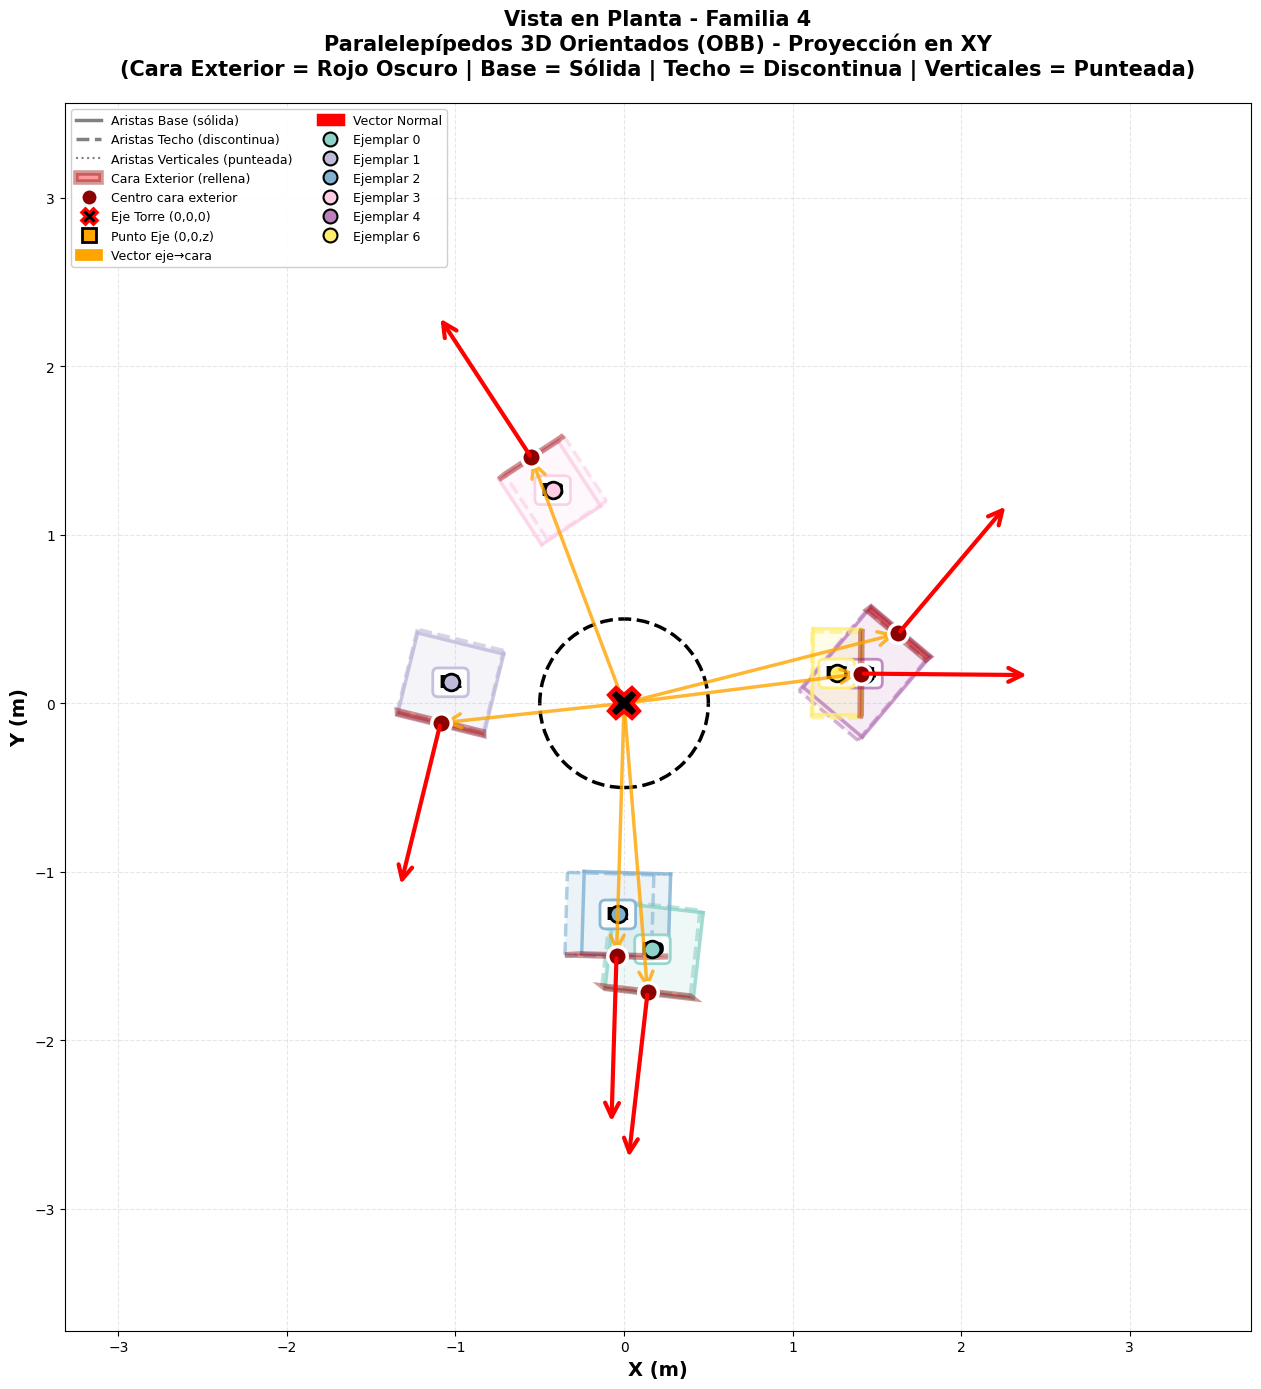

✓ Visualización general completada

GENERANDO VISUALIZACIONES INDIVIDUALES POR EJEMPLAR


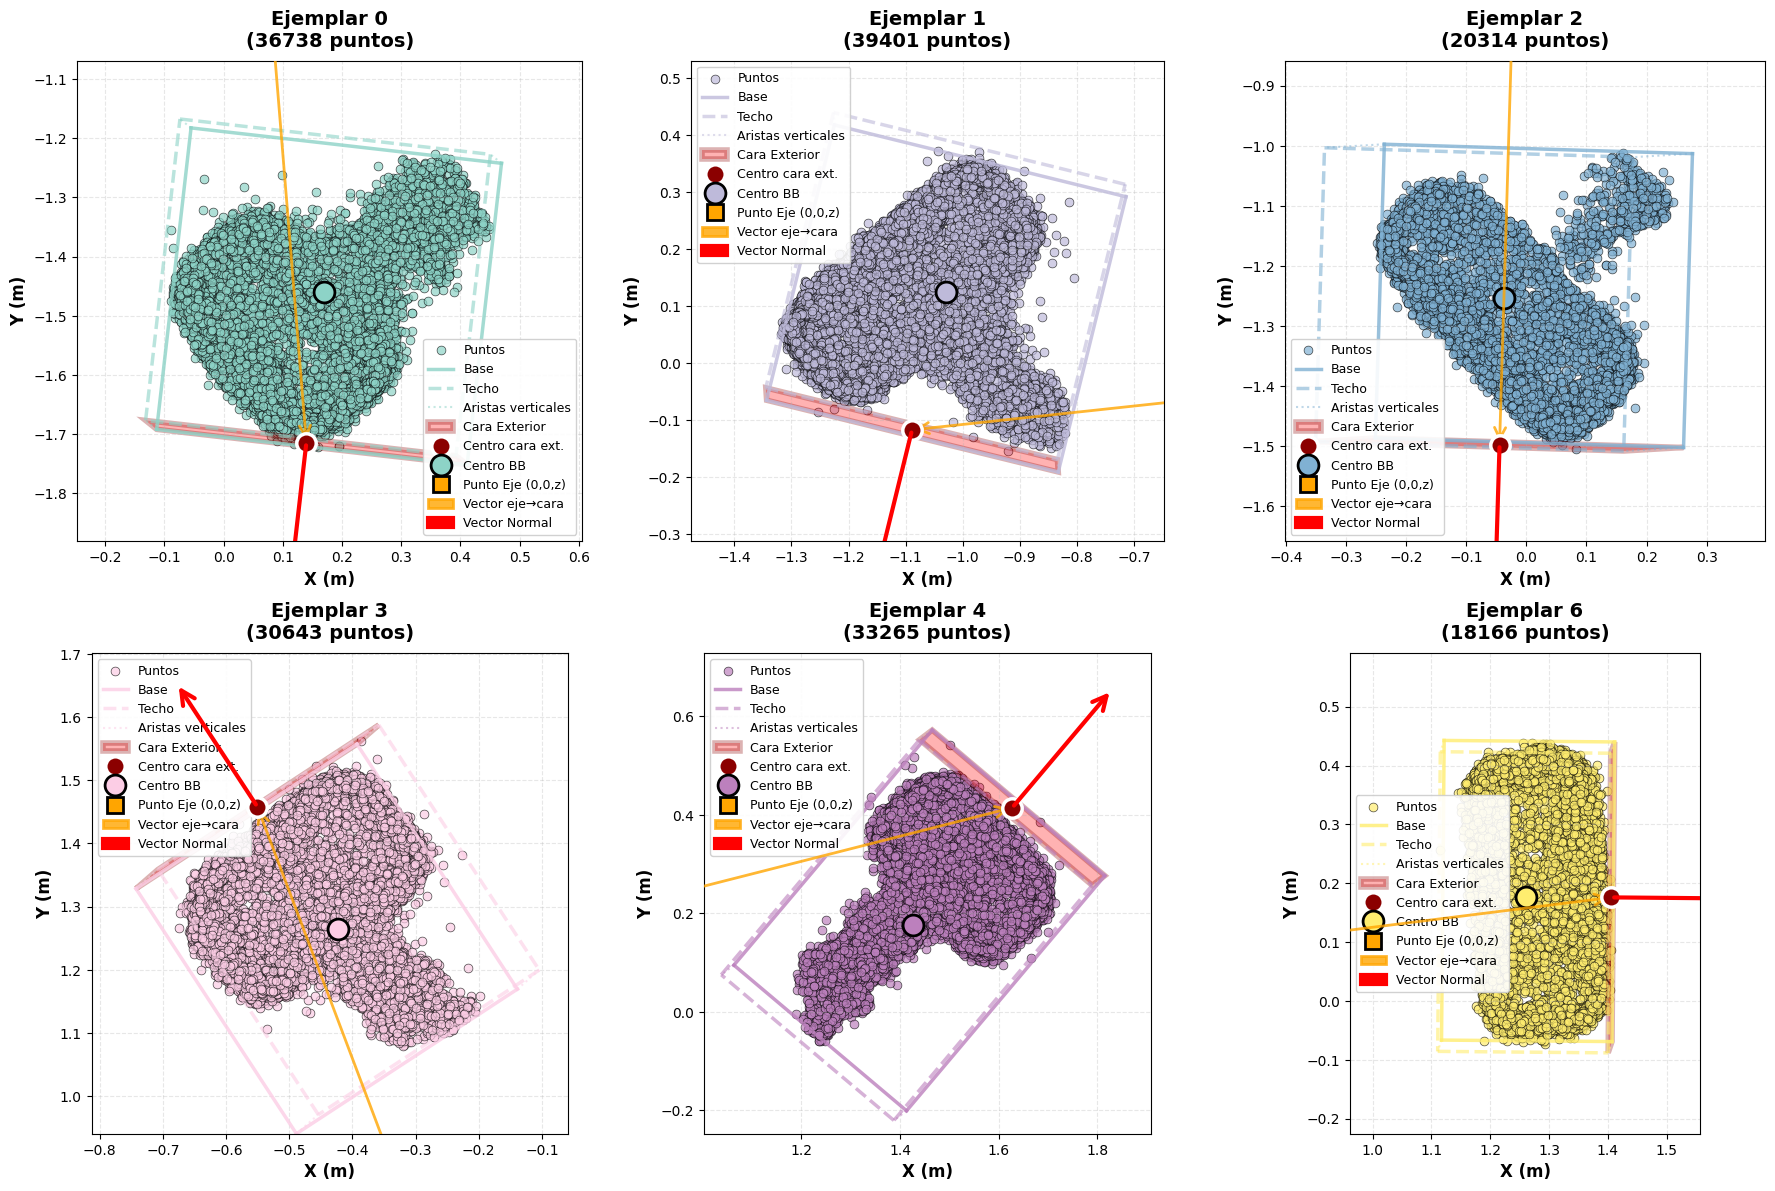

✓ 6 visualizaciones individuales completadas

Generando visualización 3D de bounding boxes...


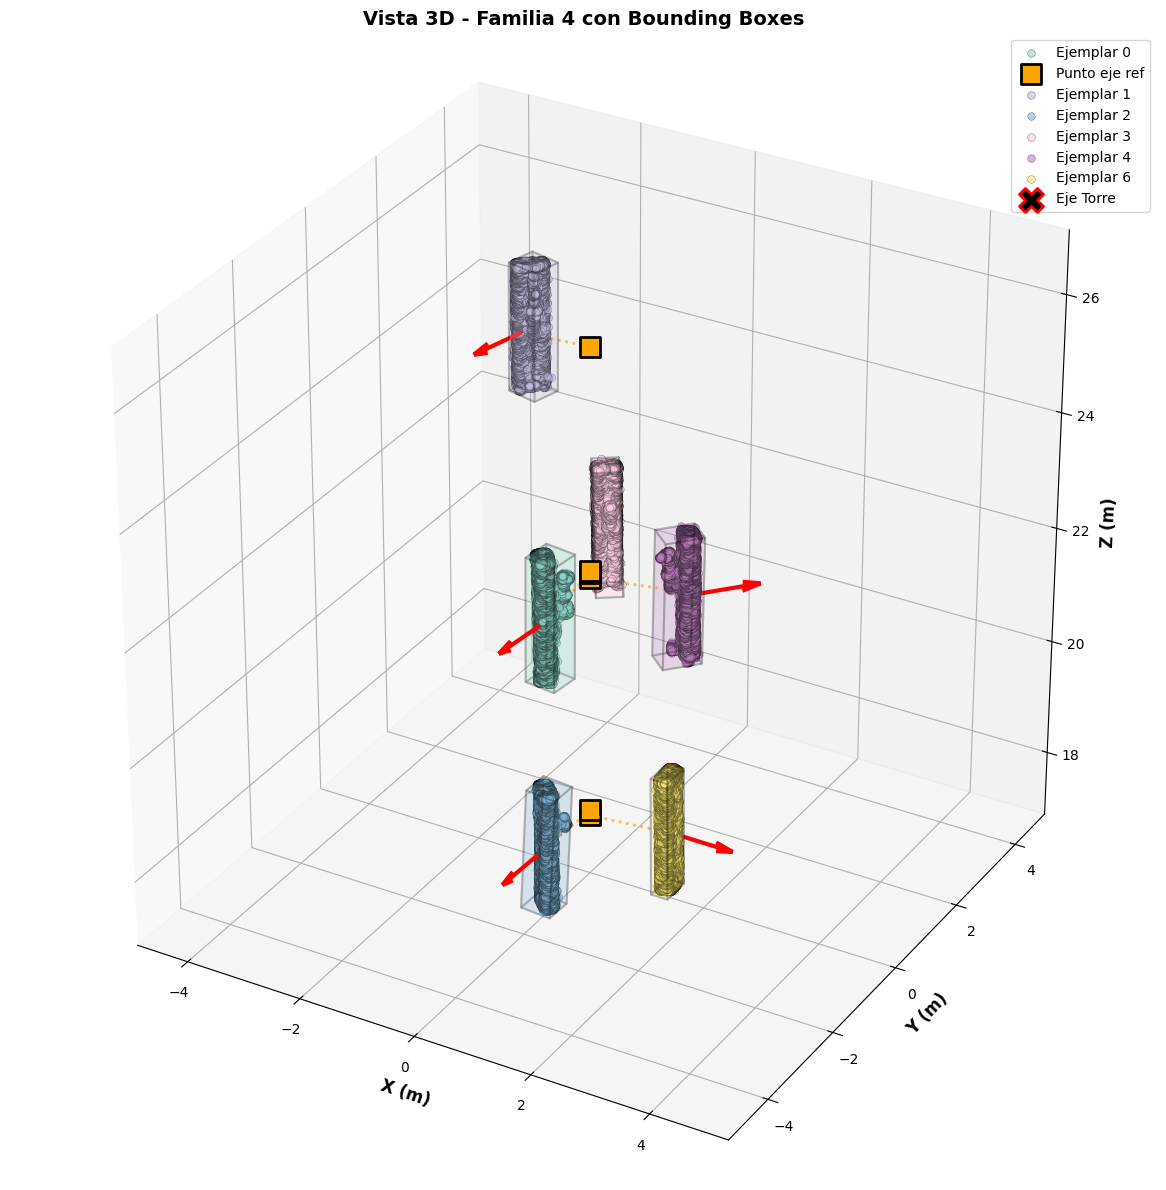

✓ Visualización 3D completada

EXPORTANDO RESULTADOS A EXCEL PARA DYNAMO

✓ Excel exportado: resultados_bbox_para_dynamo.xlsx
  - Hoja 'Resumen': 6 ejemplares
  - Hoja 'Vertices_BB': 48 vértices
  - Hoja 'Caras_Exteriores': 6 caras
  - Hoja 'Vertices_Cara_Exterior': 24 vértices

ANÁLISIS COMPLETADO
✓ Archivo Excel para Dynamo: resultados_bbox_para_dynamo.xlsx

📋 Para usar en Dynamo/Revit:
  1. Abrir Dynamo
  2. Crear nodo 'Python Script'
  3. Copiar código de 'nodo_dynamo_leer_excel.py'
  4. Conectar ruta del Excel como input


In [ ]:
# CELDA_3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull

# ============================================================================
# SELECCIÓN DE FAMILIA
# ============================================================================

print("\n" + "=" * 60)
print("ANÁLISIS DETALLADO POR FAMILIA")
print("=" * 60)

familias_disponibles = sorted(df_antenas['Familia'].unique())
print("\nFamilias disponibles:")
for i, familia in enumerate(familias_disponibles):
    n_ejemplares = len(df_antenas[df_antenas['Familia'] == familia]['Ejemplar'].unique())
    n_puntos = len(df_antenas[df_antenas['Familia'] == familia])
    print(f"  [{i}] Familia {int(familia)}: {n_ejemplares} ejemplares, {n_puntos} puntos")

familia_idx = int(input("\n¿Qué familia deseas procesar? [índice]: "))
familia_seleccionada = familias_disponibles[familia_idx]

print(f"\n✓ Familia {int(familia_seleccionada)} seleccionada")

# Filtrar datos de la familia seleccionada
df_familia = df_antenas[df_antenas['Familia'] == familia_seleccionada].copy()
ejemplares = sorted(df_familia['Ejemplar'].unique())

print(f"✓ Ejemplares en esta familia: {[int(e) for e in ejemplares]}")

# ============================================================================
# FUNCIONES AUXILIARES
# ============================================================================

def limpiar_outliers(puntos, std_threshold=2.5):
    """Elimina outliers usando desviación estándar"""
    if len(puntos) < 4:
        return puntos

    centro = np.mean(puntos, axis=0)
    distancias = np.linalg.norm(puntos - centro, axis=1)

    media_dist = np.mean(distancias)
    std_dist = np.std(distancias)

    mask = distancias < (media_dist + std_threshold * std_dist)
    return puntos[mask]

def calcular_bounding_box(puntos):
    """
    Calcula el Oriented Bounding Box (OBB) usando trimesh.

    Trimesh usa algoritmos probados para calcular el OBB de mínimo volumen
    correctamente, garantizando que TODOS los puntos estén dentro.

    Retorna:
        dict con:
        - centro: punto central del paralelepípedo
        - dimensiones: [largo, ancho, alto] en los ejes principales
        - ejes: matriz 3x3 con los vectores de los ejes principales (como COLUMNAS)
        - min_coords, max_coords: límites en el sistema de coordenadas local
        - volumen: volumen del bounding box
    """
    import trimesh

    # Crear una nube de puntos con trimesh
    point_cloud = trimesh.PointCloud(puntos)

    # Calcular el Oriented Bounding Box
    # trimesh.bounds.oriented_bounds devuelve: transform, extents
    # - transform: matriz 4x4 de transformación (rotación + traslación)
    # - extents: dimensiones [x, y, z] del BB en su sistema local
    to_origin, extents = trimesh.bounds.oriented_bounds(point_cloud)

    # Extraer la transformación del BB
    # to_origin transforma del sistema global al local del BB
    # Necesitamos la inversa para ir de local a global
    from_origin = np.linalg.inv(to_origin)

    # Extraer centro del BB (última columna de from_origin, primeras 3 filas)
    centro = from_origin[:3, 3]

    # Extraer ejes (matriz de rotación 3x3, columnas son los ejes)
    ejes = from_origin[:3, :3]

    # Dimensiones del BB
    dimensiones = extents

    # Calcular min/max coords en sistema local
    # En el sistema local del BB, está centrado en origen con extents como dimensiones
    min_coords = -extents / 2
    max_coords = extents / 2

    # Calcular volumen
    volumen = np.prod(dimensiones)

    print(f"    Trimesh OBB: volumen = {volumen:.4f} m³")

    # Verificación: comprobar que todos los puntos están dentro
    # Transformar puntos al sistema local del BB
    puntos_homogeneos = np.column_stack([puntos, np.ones(len(puntos))])
    puntos_locales = (to_origin @ puntos_homogeneos.T).T[:, :3]

    # Verificar que están dentro de los límites
    dentro = np.all((puntos_locales >= min_coords - 0.001) &
                    (puntos_locales <= max_coords + 0.001), axis=1)
    puntos_fuera = np.sum(~dentro)

    if puntos_fuera > 0:
        print(f"    ⚠️ ADVERTENCIA: {puntos_fuera} puntos fuera del BB (tolerancia 1mm)")
    else:
        print(f"    ✓ Verificación: Todos los {len(puntos)} puntos dentro del BB")

    return {
        'centro': centro,
        'dimensiones': dimensiones,
        'ejes': ejes,  # Ya como columnas
        'min_coords': min_coords,
        'max_coords': max_coords,
        'volumen': volumen
    }

def obtener_vertices_box(bb_info):
    """
    Obtiene los 8 vértices del bounding box (paralelepípedo 3D orientado).

    Los vértices están organizados así:
    - Vértices 0-3: Base inferior (Z mínima)
    - Vértices 4-7: Techo superior (Z máxima)

    El bounding box está orientado según los ejes principales de PCA,
    por lo que es un paralelepípedo que se ajusta a la geometría de los puntos.
    """
    d = bb_info['dimensiones']
    min_c = bb_info['min_coords']

    # 8 vértices del box en coordenadas locales (sistema de ejes principales)
    # Orden: base (4 vértices) + techo (4 vértices)
    vertices_locales = np.array([
        # Base inferior (Z mínima)
        [min_c[0], min_c[1], min_c[2]],                      # 0: esquina (-X, -Y, -Z)
        [min_c[0] + d[0], min_c[1], min_c[2]],               # 1: esquina (+X, -Y, -Z)
        [min_c[0] + d[0], min_c[1] + d[1], min_c[2]],        # 2: esquina (+X, +Y, -Z)
        [min_c[0], min_c[1] + d[1], min_c[2]],               # 3: esquina (-X, +Y, -Z)
        # Techo superior (Z máxima)
        [min_c[0], min_c[1], min_c[2] + d[2]],               # 4: esquina (-X, -Y, +Z)
        [min_c[0] + d[0], min_c[1], min_c[2] + d[2]],        # 5: esquina (+X, -Y, +Z)
        [min_c[0] + d[0], min_c[1] + d[1], min_c[2] + d[2]], # 6: esquina (+X, +Y, +Z)
        [min_c[0], min_c[1] + d[1], min_c[2] + d[2]]         # 7: esquina (-X, +Y, +Z)
    ])

    # Transformar a coordenadas globales usando los ejes principales
    vertices_globales = bb_info['centro'] + vertices_locales @ bb_info['ejes'].T

    return vertices_globales

def identificar_cara_exterior(bb_info, puntos_limpios):
    """
    Identifica la cara del bounding box más alejada del punto del eje vertical
    que está a la misma altura Z que el centro de la BB.

    ALGORITMO MEJORADO:
    1. Filtrar caras laterales (excluir superior/inferior con |normal.z| > 0.7)
    2. De las caras laterales, ordenar por distancia al punto (0,0,z)
    3. Tomar las 2 más alejadas
    4. Contar puntos de la nube cercanos a cada cara (< 0.1m)
    5. Elegir la cara con más puntos cercanos

    Retorna: información completa de la cara exterior
    """
    centro_box = bb_info['centro']
    ejes = bb_info['ejes']
    dims = bb_info['dimensiones']

    # Punto del eje a la misma altura que el centro de la BB
    z_centro = centro_box[2]
    punto_eje_ref = np.array([0.0, 0.0, z_centro])

    # Calcular información de las 6 caras
    caras_info = []
    nombres_caras = ['-X', '+X', '-Y', '+Y', '-Z', '+Z']

    for nombre in nombres_caras:
        # Obtener vértices de la cara
        vertices_cara = obtener_vertices_cara_por_nombre(nombre, bb_info)

        # Centro de la cara = promedio de sus 4 vértices
        centro_cara = np.mean(vertices_cara, axis=0)

        # Normal de la cara
        if nombre == '-X':
            normal_local = np.array([-1, 0, 0])
            area = dims[1] * dims[2]
        elif nombre == '+X':
            normal_local = np.array([1, 0, 0])
            area = dims[1] * dims[2]
        elif nombre == '-Y':
            normal_local = np.array([0, -1, 0])
            area = dims[0] * dims[2]
        elif nombre == '+Y':
            normal_local = np.array([0, 1, 0])
            area = dims[0] * dims[2]
        elif nombre == '-Z':
            normal_local = np.array([0, 0, -1])
            area = dims[0] * dims[1]
        else:  # +Z
            normal_local = np.array([0, 0, 1])
            area = dims[0] * dims[1]

        # Normal en coordenadas globales
        normal_global = normal_local @ ejes.T

        # Distancia 3D al punto del eje
        distancia_al_punto_eje = np.linalg.norm(centro_cara - punto_eje_ref)

        caras_info.append({
            'nombre': nombre,
            'centro_global': centro_cara,
            'normal_local': normal_local,
            'normal_global': normal_global,
            'area': area,
            'vertices_cara': vertices_cara,
            'distancia_punto_eje': distancia_al_punto_eje,
            'normal_z_abs': abs(normal_global[2])
        })

    # PASO 1: Filtrar caras laterales (excluir superior/inferior)
    umbral_vertical = 0.7
    caras_laterales = [c for c in caras_info if c['normal_z_abs'] <= umbral_vertical]

    print(f"  Filtrado: {len(caras_laterales)} caras laterales de 6 totales")
    for c in caras_info:
        if c['normal_z_abs'] > umbral_vertical:
            print(f"    ✗ Cara {c['nombre']} excluida (|normal.z|={c['normal_z_abs']:.3f} > {umbral_vertical})")

    # PASO 2: Ordenar caras laterales por distancia y tomar las 2 más alejadas
    caras_laterales.sort(key=lambda x: x['distancia_punto_eje'], reverse=True)

    if len(caras_laterales) < 2:
        # Caso extremo: si hay menos de 2 caras laterales, usar todas las caras
        print(f"  ⚠️ Advertencia: Solo {len(caras_laterales)} caras laterales, usando todas las caras")
        caras_laterales = caras_info
        caras_laterales.sort(key=lambda x: x['distancia_punto_eje'], reverse=True)

    dos_mas_alejadas = caras_laterales[:2]

    print(f"  Candidatas: {dos_mas_alejadas[0]['nombre']} (dist={dos_mas_alejadas[0]['distancia_punto_eje']:.2f}m), "
          f"{dos_mas_alejadas[1]['nombre']} (dist={dos_mas_alejadas[1]['distancia_punto_eje']:.2f}m)")

    # PASO 3: Contar puntos cercanos a cada cara candidata
    umbral_distancia_puntos = 0.1  # 10 cm

    for cara in dos_mas_alejadas:
        centro_cara = cara['centro_global']
        normal_cara = cara['normal_global']

        # Calcular distancia de cada punto al plano de la cara
        # Distancia = |(punto - centro_cara) · normal|
        vectores_puntos = puntos_limpios - centro_cara
        distancias_al_plano = np.abs(np.dot(vectores_puntos, normal_cara))

        # Contar puntos cercanos
        puntos_cercanos = np.sum(distancias_al_plano < umbral_distancia_puntos)
        cara['puntos_cercanos'] = puntos_cercanos

        print(f"    {cara['nombre']}: {puntos_cercanos} puntos cercanos (< {umbral_distancia_puntos}m)")

    # PASO 4: Elegir la cara con más puntos cercanos
    cara_exterior = max(dos_mas_alejadas, key=lambda x: x['puntos_cercanos'])

    print(f"  ✓ Cara seleccionada: {cara_exterior['nombre']} ({cara_exterior['puntos_cercanos']} puntos)")

    # Orientar el vector normal hacia el exterior
    vec_desde_eje = cara_exterior['centro_global'] - punto_eje_ref
    dot_producto = np.dot(cara_exterior['normal_global'], vec_desde_eje)

    if dot_producto < 0:
        cara_exterior['normal_global'] = -cara_exterior['normal_global']

    cara_exterior['punto_eje_ref'] = punto_eje_ref
    cara_exterior['dot_producto'] = dot_producto

    return cara_exterior

def obtener_vertices_cara_por_nombre(nombre_cara, bb_info):
    """
    Obtiene los 4 vértices que forman una cara del paralelepípedo dado su nombre.
    """
    dims = bb_info['dimensiones']
    min_c = bb_info['min_coords']
    max_c = bb_info['max_coords']
    ejes = bb_info['ejes']
    centro_box = bb_info['centro']

    # Definir los 4 vértices en coordenadas locales según la cara
    if nombre_cara == '+X':
        vertices_locales = np.array([
            [max_c[0], min_c[1], min_c[2]],
            [max_c[0], max_c[1], min_c[2]],
            [max_c[0], max_c[1], max_c[2]],
            [max_c[0], min_c[1], max_c[2]]
        ])
    elif nombre_cara == '-X':
        vertices_locales = np.array([
            [min_c[0], min_c[1], min_c[2]],
            [min_c[0], max_c[1], min_c[2]],
            [min_c[0], max_c[1], max_c[2]],
            [min_c[0], min_c[1], max_c[2]]
        ])
    elif nombre_cara == '+Y':
        vertices_locales = np.array([
            [min_c[0], max_c[1], min_c[2]],
            [max_c[0], max_c[1], min_c[2]],
            [max_c[0], max_c[1], max_c[2]],
            [min_c[0], max_c[1], max_c[2]]
        ])
    elif nombre_cara == '-Y':
        vertices_locales = np.array([
            [min_c[0], min_c[1], min_c[2]],
            [max_c[0], min_c[1], min_c[2]],
            [max_c[0], min_c[1], max_c[2]],
            [min_c[0], min_c[1], max_c[2]]
        ])
    elif nombre_cara == '+Z':
        vertices_locales = np.array([
            [min_c[0], min_c[1], max_c[2]],
            [max_c[0], min_c[1], max_c[2]],
            [max_c[0], max_c[1], max_c[2]],
            [min_c[0], max_c[1], max_c[2]]
        ])
    else:  # -Z
        vertices_locales = np.array([
            [min_c[0], min_c[1], min_c[2]],
            [max_c[0], min_c[1], min_c[2]],
            [max_c[0], max_c[1], min_c[2]],
            [min_c[0], max_c[1], min_c[2]]
        ])

    # Transformar a coordenadas globales
    vertices_globales = centro_box + vertices_locales @ ejes.T

    return vertices_globales

# ============================================================================
# PROCESAMIENTO DE CADA EJEMPLAR
# ============================================================================

print("\n" + "=" * 60)
print("PROCESAMIENTO DE EJEMPLARES")
print("=" * 60)

resultados_ejemplares = {}

for ejemplar in ejemplares:
    print(f"\n--- Ejemplar {int(ejemplar)} ---")

    # Obtener puntos del ejemplar
    df_ejemplar = df_familia[df_familia['Ejemplar'] == ejemplar]
    puntos = df_ejemplar[['X_rel', 'Y_rel', 'Z_rel']].values

    print(f"  Puntos originales: {len(puntos)}")

    # 1. Limpieza de outliers
    puntos_limpios = limpiar_outliers(puntos)
    print(f"  Puntos tras limpieza: {len(puntos_limpios)} (eliminados: {len(puntos) - len(puntos_limpios)})")

    # 2. Calcular bounding box
    bb_info = calcular_bounding_box(puntos_limpios)
    print(f"  Bounding Box (OBB con Trimesh):")
    print(f"    - Dimensión en eje principal 1: {bb_info['dimensiones'][0]:.3f} m")
    print(f"    - Dimensión en eje principal 2: {bb_info['dimensiones'][1]:.3f} m")
    print(f"    - Dimensión en eje principal 3: {bb_info['dimensiones'][2]:.3f} m")
    print(f"    - Volumen: {bb_info['volumen']:.3f} m³")

    # 3. Identificar cara exterior
    cara_exterior = identificar_cara_exterior(bb_info, puntos_limpios)
    print(f"  Cara exterior: {cara_exterior['nombre']}")
    print(f"  Punto eje ref: ({cara_exterior['punto_eje_ref'][0]:.2f}, "
          f"{cara_exterior['punto_eje_ref'][1]:.2f}, {cara_exterior['punto_eje_ref'][2]:.2f})")
    print(f"  Centro cara: ({cara_exterior['centro_global'][0]:.2f}, "
          f"{cara_exterior['centro_global'][1]:.2f}, {cara_exterior['centro_global'][2]:.2f})")
    print(f"  Distancia cara-eje: {cara_exterior['distancia_punto_eje']:.2f} m")
    print(f"  Vector normal: ({cara_exterior['normal_global'][0]:.3f}, "
          f"{cara_exterior['normal_global'][1]:.3f}, {cara_exterior['normal_global'][2]:.3f})")
    print(f"  Producto punto: {cara_exterior.get('dot_producto', 0):.3f}")

    # Guardar resultados
    resultados_ejemplares[ejemplar] = {
        'puntos_originales': puntos,
        'puntos_limpios': puntos_limpios,
        'bb_info': bb_info,
        'vertices': obtener_vertices_box(bb_info),
        'cara_exterior': cara_exterior
    }

# ============================================================================
# VISUALIZACIÓN EN PLANTA - VISTA GENERAL (solo BB y caras exteriores)
# ============================================================================

print("\n" + "=" * 60)
print("GENERANDO VISUALIZACIÓN EN PLANTA - VISTA GENERAL")
print("=" * 60)
print("\nNOTA: El Bounding Box es un PARALELEPÍPEDO 3D orientado (OBB)")
print("      calculado con TRIMESH (algoritmos robustos y probados).")
print("      Garantiza que TODOS los puntos están dentro del BB.")
print("")
print("ALGORITMO MEJORADO de identificación de cara exterior:")
print("  1. Se filtran las caras LATERALES (excluir superior/inferior con |normal.z| > 0.7)")
print("  2. Se ordenan por distancia al punto del eje (0, 0, z_centro)")
print("  3. Se toman las 2 caras más alejadas")
print("  4. Se cuentan los puntos de la nube cercanos a cada cara (< 10cm)")
print("  5. Se elige la cara con MÁS PUNTOS cercanos")
print("  6. El vector normal apunta desde el centro de esa cara hacia fuera")
print("")
print("La vista en planta muestra:")
print("  - Aristas de la base (línea sólida)")
print("  - Aristas del techo (línea discontinua)")
print("  - Aristas verticales (línea punteada)")
print("  - Cara exterior en ROJO (la más alejada con más puntos)")
print("  - Punto del eje de referencia en NARANJA (0, 0, z_centro)")
print("  - Vector naranja: dirección desde punto eje → centro cara")
print("  - Vector rojo: normal perpendicular a la cara exterior")
print("")

fig, ax = plt.subplots(figsize=(14, 14))

# Colores para cada ejemplar
colores = plt.cm.Set3(np.linspace(0, 1, len(ejemplares)))

for idx, (ejemplar, datos) in enumerate(resultados_ejemplares.items()):
    color = colores[idx]

    # Obtener los 8 vértices del bounding box 3D
    vertices = datos['vertices']  # 8 vértices [x, y, z]

    # Proyección en XY (vista en planta)
    vertices_xy = vertices[:, :2]

    # Dibujar todas las aristas del paralelepípedo proyectadas en planta
    # Los vértices están ordenados así:
    # 0-3: base inferior, 4-7: techo superior
    # Conexiones: 0-1, 1-2, 2-3, 3-0 (base)
    #            4-5, 5-6, 6-7, 7-4 (techo)
    #            0-4, 1-5, 2-6, 3-7 (verticales)

    aristas = [
        # Base inferior
        [0, 1], [1, 2], [2, 3], [3, 0],
        # Techo superior
        [4, 5], [5, 6], [6, 7], [7, 4],
        # Aristas verticales
        [0, 4], [1, 5], [2, 6], [3, 7]
    ]

    # Dibujar todas las aristas
    for i, arista in enumerate(aristas):
        v1, v2 = arista
        if i < 4:  # Base
            ax.plot([vertices_xy[v1, 0], vertices_xy[v2, 0]],
                   [vertices_xy[v1, 1], vertices_xy[v2, 1]],
                   color=color, linewidth=2.5, alpha=0.8)
        elif i < 8:  # Techo
            ax.plot([vertices_xy[v1, 0], vertices_xy[v2, 0]],
                   [vertices_xy[v1, 1], vertices_xy[v2, 1]],
                   color=color, linewidth=2.5, alpha=0.6, linestyle='--')
        else:  # Verticales
            ax.plot([vertices_xy[v1, 0], vertices_xy[v2, 0]],
                   [vertices_xy[v1, 1], vertices_xy[v2, 1]],
                   color=color, linewidth=1.5, alpha=0.5, linestyle=':')

    # Rellenar el polígono convexo de todos los vértices proyectados
    from scipy.spatial import ConvexHull
    hull = ConvexHull(vertices_xy)
    vertices_ordenados = vertices_xy[hull.vertices]
    polygon = plt.Polygon(vertices_ordenados, fill=True, alpha=0.15,
                         facecolor=color, edgecolor='none',
                         label=f'Ejemplar {int(ejemplar)}')
    ax.add_patch(polygon)

    # ===== CARA EXTERIOR =====
    cara = datos['cara_exterior']
    centro_cara = cara['centro_global']
    normal = cara['normal_global']
    vertices_cara_3d = cara['vertices_cara']  # Ya calculados en identificar_cara_exterior

    # Proyectar vértices de la cara en XY
    vertices_cara_xy = vertices_cara_3d[:, :2]

    # Dibujar la cara exterior rellena
    cara_poly = plt.Polygon(vertices_cara_xy, fill=True, alpha=0.4,
                           facecolor='red', edgecolor='darkred', linewidth=4,
                           zorder=5)
    ax.add_patch(cara_poly)

    # ===== CENTRO DE LA CARA EXTERIOR =====
    ax.plot(centro_cara[0], centro_cara[1], 'o', color='darkred',
           markersize=14, markeredgecolor='white', markeredgewidth=2.5,
           zorder=8, label='Centro cara ext.' if idx == 0 else '')

    # Centro del bounding box
    centro = datos['bb_info']['centro']
    ax.plot(centro[0], centro[1], 'o', color=color, markersize=12,
           markeredgecolor='black', markeredgewidth=2, zorder=6)

    # ===== PUNTO DEL EJE DE REFERENCIA (0,0,z) =====
    punto_eje = cara['punto_eje_ref']
    ax.plot(punto_eje[0], punto_eje[1], 's', color='orange', markersize=12,
           markeredgecolor='black', markeredgewidth=2, zorder=7,
           label='Punto eje (0,0,z)' if idx == 0 else '')

    # ===== VECTOR: PUNTO EJE → CENTRO CARA (dirección) =====
    arrow_eje_cara = FancyArrowPatch(
        (punto_eje[0], punto_eje[1]),
        (centro_cara[0], centro_cara[1]),
        arrowstyle='->', mutation_scale=25, linewidth=2.5,
        color='orange', alpha=0.8, zorder=6,
        label='Vector eje→cara' if idx == 0 else ''
    )
    ax.add_patch(arrow_eje_cara)

    # ===== VECTOR NORMAL desde centro de cara =====
    escala_vector = 1.0  # Reducido de 2.5 a 1.0
    vector_end = centro_cara[:2] + normal[:2] * escala_vector

    arrow = FancyArrowPatch(
        (centro_cara[0], centro_cara[1]),
        (vector_end[0], vector_end[1]),
        arrowstyle='->', mutation_scale=25, linewidth=3,
        color='red', zorder=10,
        label='Vector normal' if idx == 0 else ''
    )
    ax.add_patch(arrow)

    # Etiqueta del ejemplar
    ax.text(centro[0], centro[1], f'E{int(ejemplar)}',
           fontsize=13, fontweight='bold', ha='center', va='center',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor=color, linewidth=2))

# Dibujar el eje de la torre (origen)
ax.plot(0, 0, 'X', color='black', markersize=22, markeredgecolor='red',
       markeredgewidth=3, label='Eje Torre (0,0)', zorder=10)

# Círculo que representa la torre
circulo_torre = plt.Circle((0, 0), 0.5, fill=False, edgecolor='black',
                          linewidth=2.5, linestyle='--', label='Torre')
ax.add_patch(circulo_torre)

# Configuración de ejes
ax.set_xlabel('X (m)', fontsize=14, fontweight='bold')
ax.set_ylabel('Y (m)', fontsize=14, fontweight='bold')
ax.set_title(f'Vista en Planta - Familia {int(familia_seleccionada)}\n'
            f'Paralelepípedos 3D Orientados (OBB) - Proyección en XY\n'
            f'(Cara Exterior = Rojo Oscuro | Base = Sólida | Techo = Discontinua | Verticales = Punteada)',
            fontsize=15, fontweight='bold', pad=20)

# Aspecto igual para mantener proporciones
ax.set_aspect('equal')
ax.grid(True, alpha=0.3, linestyle='--')

# Crear elementos de leyenda personalizados
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
elementos_leyenda = [
    Line2D([0], [0], color='gray', linewidth=2.5, label='Aristas Base (sólida)'),
    Line2D([0], [0], color='gray', linewidth=2.5, linestyle='--', label='Aristas Techo (discontinua)'),
    Line2D([0], [0], color='gray', linewidth=1.5, linestyle=':', label='Aristas Verticales (punteada)'),
    Patch(facecolor='red', alpha=0.4, edgecolor='darkred', linewidth=4, label='Cara Exterior (rellena)'),
    Line2D([0], [0], marker='o', color='darkred', markersize=12, linestyle='None',
           markeredgecolor='white', markeredgewidth=2, label='Centro cara exterior'),
    Line2D([0], [0], marker='X', color='black', markersize=12, linestyle='None',
           markeredgecolor='red', markeredgewidth=2, label='Eje Torre (0,0,0)'),
    Line2D([0], [0], marker='s', color='orange', markersize=10, linestyle='None',
           markeredgecolor='black', markeredgewidth=2, label='Punto Eje (0,0,z)'),
    FancyArrowPatch((0,0), (0.1,0.1), arrowstyle='->', mutation_scale=15,
                    linewidth=2, color='orange', label='Vector eje→cara'),
    FancyArrowPatch((0,0), (0.1,0.1), arrowstyle='->', mutation_scale=15,
                    linewidth=2.5, color='red', label='Vector Normal')
]

# Añadir ejemplares a la leyenda
for idx, ejemplar in enumerate(ejemplares):
    elementos_leyenda.append(
        Line2D([0], [0], marker='o', color=colores[idx], markersize=10,
               linestyle='None', markeredgecolor='black', markeredgewidth=1.5,
               label=f'Ejemplar {int(ejemplar)}')
    )

ax.legend(handles=elementos_leyenda, loc='upper left', fontsize=9, framealpha=0.95, ncol=2)

# Ajustar límites
all_points = np.vstack([datos['puntos_limpios'] for datos in resultados_ejemplares.values()])
margin = 2
ax.set_xlim(all_points[:, 0].min() - margin, all_points[:, 0].max() + margin)
ax.set_ylim(all_points[:, 1].min() - margin, all_points[:, 1].max() + margin)

plt.tight_layout()
plt.show()

print("✓ Visualización general completada")

# ============================================================================
# VISUALIZACIÓN EN PLANTA - EJEMPLARES INDIVIDUALES
# ============================================================================

print("\n" + "=" * 60)
print("GENERANDO VISUALIZACIONES INDIVIDUALES POR EJEMPLAR")
print("=" * 60)

# Calcular número de filas y columnas para subplots
n_ejemplares = len(ejemplares)
n_cols = min(3, n_ejemplares)
n_rows = int(np.ceil(n_ejemplares / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 6*n_rows))
if n_ejemplares == 1:
    axes = np.array([axes])
axes = axes.flatten()

for idx, (ejemplar, datos) in enumerate(resultados_ejemplares.items()):
    ax = axes[idx]
    color = colores[idx]

    # Puntos limpios
    puntos = datos['puntos_limpios']
    ax.scatter(puntos[:, 0], puntos[:, 1], c=[color], s=40, alpha=0.7,
              edgecolors='black', linewidth=0.5, label='Puntos')

    # Obtener los 8 vértices del bounding box
    vertices = datos['vertices']
    vertices_xy = vertices[:, :2]

    # Dibujar todas las aristas del paralelepípedo
    aristas = [
        # Base inferior
        [0, 1], [1, 2], [2, 3], [3, 0],
        # Techo superior
        [4, 5], [5, 6], [6, 7], [7, 4],
        # Aristas verticales
        [0, 4], [1, 5], [2, 6], [3, 7]
    ]

    for i, arista in enumerate(aristas):
        v1, v2 = arista
        if i < 4:  # Base
            ax.plot([vertices_xy[v1, 0], vertices_xy[v2, 0]],
                   [vertices_xy[v1, 1], vertices_xy[v2, 1]],
                   color=color, linewidth=2.5, alpha=0.8,
                   label='Base' if i == 0 else '')
        elif i < 8:  # Techo
            ax.plot([vertices_xy[v1, 0], vertices_xy[v2, 0]],
                   [vertices_xy[v1, 1], vertices_xy[v2, 1]],
                   color=color, linewidth=2.5, alpha=0.6, linestyle='--',
                   label='Techo' if i == 4 else '')
        else:  # Verticales
            ax.plot([vertices_xy[v1, 0], vertices_xy[v2, 0]],
                   [vertices_xy[v1, 1], vertices_xy[v2, 1]],
                   color=color, linewidth=1.5, alpha=0.5, linestyle=':',
                   label='Aristas verticales' if i == 8 else '')

    # ===== CARA EXTERIOR =====
    cara = datos['cara_exterior']
    centro_cara = cara['centro_global']
    normal = cara['normal_global']
    vertices_cara_3d = cara['vertices_cara']  # Ya calculados

    # Proyectar vértices en XY
    vertices_cara_xy = vertices_cara_3d[:, :2]

    # Rellenar cara exterior
    cara_poly = plt.Polygon(vertices_cara_xy, fill=True, alpha=0.3,
                           facecolor='red', edgecolor='darkred', linewidth=4,
                           label='Cara Exterior')
    ax.add_patch(cara_poly)

    # Centro de la cara exterior
    ax.plot(centro_cara[0], centro_cara[1], 'o', color='darkred',
           markersize=14, markeredgecolor='white', markeredgewidth=2.5,
           label='Centro cara ext.', zorder=8)

    # Centro del BB
    centro = datos['bb_info']['centro']
    ax.plot(centro[0], centro[1], 'o', color=color, markersize=15,
           markeredgecolor='black', markeredgewidth=2, label='Centro BB', zorder=6)

    # Punto del eje a la altura del centro
    punto_eje = cara['punto_eje_ref']
    ax.plot(punto_eje[0], punto_eje[1], 's', color='orange', markersize=12,
           markeredgecolor='black', markeredgewidth=2, label='Punto Eje (0,0,z)', zorder=7)

    # Vector desde punto eje al centro de la cara
    arrow_eje_cara = FancyArrowPatch(
        (punto_eje[0], punto_eje[1]),
        (centro_cara[0], centro_cara[1]),
        arrowstyle='->', mutation_scale=20, linewidth=2,
        color='orange', alpha=0.8, zorder=6,
        label='Vector eje→cara'
    )
    ax.add_patch(arrow_eje_cara)

    # Vector normal
    escala_vector = max(datos['bb_info']['dimensiones'][:2]) * 0.5  # Reducido de 0.8 a 0.5
    vector_end = centro_cara[:2] + normal[:2] * escala_vector

    arrow = FancyArrowPatch(
        (centro_cara[0], centro_cara[1]),
        (vector_end[0], vector_end[1]),
        arrowstyle='->', mutation_scale=25, linewidth=3,
        color='red', zorder=10, label='Vector Normal'
    )
    ax.add_patch(arrow)

    # Eje de la torre
    ax.plot(0, 0, 'X', color='black', markersize=20, markeredgecolor='red',
           markeredgewidth=2.5, zorder=10)

    # Configuración
    ax.set_xlabel('X (m)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Y (m)', fontsize=12, fontweight='bold')
    ax.set_title(f'Ejemplar {int(ejemplar)}\n({len(puntos)} puntos)',
                fontsize=14, fontweight='bold', pad=10)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='best', fontsize=9, framealpha=0.9)

    # Ajustar límites con margen
    margin = max(datos['bb_info']['dimensiones'][:2]) * 0.3
    ax.set_xlim(puntos[:, 0].min() - margin, puntos[:, 0].max() + margin)
    ax.set_ylim(puntos[:, 1].min() - margin, puntos[:, 1].max() + margin)

# Ocultar ejes vacíos si hay menos ejemplares que subplots
for idx in range(n_ejemplares, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print(f"✓ {n_ejemplares} visualizaciones individuales completadas")

# ============================================================================
# VISUALIZACIÓN 3D DE BOUNDING BOXES
# ============================================================================

print("\nGenerando visualización 3D de bounding boxes...")

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

for idx, (ejemplar, datos) in enumerate(resultados_ejemplares.items()):
    color = colores[idx]

    # Puntos limpios
    puntos = datos['puntos_limpios']
    ax.scatter(puntos[:, 0], puntos[:, 1], puntos[:, 2],
              c=[color], s=30, alpha=0.6, edgecolors='black', linewidth=0.3,
              label=f'Ejemplar {int(ejemplar)}')

    # Dibujar bounding box
    vertices = datos['vertices']

    # Definir las 6 caras del cuboide
    caras = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # Base
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # Techo
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # Cara 1
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # Cara 2
        [vertices[0], vertices[3], vertices[7], vertices[4]],  # Cara 3
        [vertices[1], vertices[2], vertices[6], vertices[5]]   # Cara 4
    ]

    # Dibujar caras del bounding box
    poly = Poly3DCollection(caras, alpha=0.15, facecolor=color,
                           edgecolor='black', linewidth=1.5)
    ax.add_collection3d(poly)

    # Vector normal desde la cara exterior
    cara = datos['cara_exterior']
    centro_cara = cara['centro_global']
    normal = cara['normal_global']

    # Dibujar vector normal más corto
    escala_vector = 1.0  # Reducido de 2.0 a 1.0
    ax.quiver(centro_cara[0], centro_cara[1], centro_cara[2],
             normal[0]*escala_vector, normal[1]*escala_vector, normal[2]*escala_vector,
             color='red', arrow_length_ratio=0.3, linewidth=3)

    # Punto del eje a la altura del centro de la BB
    punto_eje = cara['punto_eje_ref']
    ax.scatter([punto_eje[0]], [punto_eje[1]], [punto_eje[2]],
              c='orange', marker='s', s=200,
              label='Punto eje ref' if idx == 0 else '',
              edgecolors='black', linewidth=2, zorder=8)

    # Línea desde punto del eje al centro de la cara
    ax.plot([punto_eje[0], centro_cara[0]],
           [punto_eje[1], centro_cara[1]],
           [punto_eje[2], centro_cara[2]],
           color='orange', linewidth=2, linestyle=':', alpha=0.7, zorder=7)

# Eje de la torre
ax.scatter([0], [0], [0], c='black', marker='X', s=300,
          label='Eje Torre', edgecolors='red', linewidth=2)

ax.set_xlabel('X (m)', fontsize=12, fontweight='bold')
ax.set_ylabel('Y (m)', fontsize=12, fontweight='bold')
ax.set_zlabel('Z (m)', fontsize=12, fontweight='bold')
ax.set_title(f'Vista 3D - Familia {int(familia_seleccionada)} con Bounding Boxes',
            fontsize=14, fontweight='bold')

# Aspecto igual
max_range = np.array([
    all_points[:, 0].max() - all_points[:, 0].min(),
    all_points[:, 1].max() - all_points[:, 1].min(),
    all_points[:, 2].max() - all_points[:, 2].min()
]).max() / 2.0

mid_x = (all_points[:, 0].max() + all_points[:, 0].min()) * 0.5
mid_y = (all_points[:, 1].max() + all_points[:, 1].min()) * 0.5
mid_z = (all_points[:, 2].max() + all_points[:, 2].min()) * 0.5

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)
ax.set_box_aspect([1, 1, 1])

ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualización 3D completada")

# ============================================================================
# EXPORTAR A EXCEL PARA DYNAMO
# ============================================================================

print("\n" + "=" * 60)
print("EXPORTANDO RESULTADOS A EXCEL PARA DYNAMO")
print("=" * 60)

def exportar_a_excel_dynamo(resultados_ejemplares, familia_id, nombre_archivo='resultados_bbox_para_dynamo.xlsx'):
    """Exporta los resultados a Excel optimizado para Dynamo"""
    import pandas as pd
    from openpyxl import Workbook
    from openpyxl.styles import Font, PatternFill, Alignment
    from openpyxl.utils.dataframe import dataframe_to_rows

    # HOJA 1: RESUMEN
    resumen_data = []
    for ejemplar, datos in resultados_ejemplares.items():
        centro_bb = datos['bb_info']['centro']
        volumen = datos['bb_info']['volumen']  # Usar volumen precalculado
        resumen_data.append({
            'Ejemplar': int(ejemplar),
            'Familia': familia_id,
            'N_Puntos_Originales': len(datos['puntos_originales']),
            'N_Puntos_Limpios': len(datos['puntos_limpios']),
            'Volumen_BB_m3': round(volumen, 4),
            'Centro_BB_X': round(centro_bb[0], 4),
            'Centro_BB_Y': round(centro_bb[1], 4),
            'Centro_BB_Z': round(centro_bb[2], 4),
            'Dim_Eje1_m': round(datos['bb_info']['dimensiones'][0], 4),
            'Dim_Eje2_m': round(datos['bb_info']['dimensiones'][1], 4),
            'Dim_Eje3_m': round(datos['bb_info']['dimensiones'][2], 4)
        })
    df_resumen = pd.DataFrame(resumen_data)

    # HOJA 2: VÉRTICES BB
    vertices_bb_data = []
    for ejemplar, datos in resultados_ejemplares.items():
        vertices = datos['vertices']
        for i, vertice in enumerate(vertices):
            vertices_bb_data.append({
                'Ejemplar': int(ejemplar),
                'Vertice_ID': i,
                'X': round(vertice[0], 4),
                'Y': round(vertice[1], 4),
                'Z': round(vertice[2], 4)
            })
    df_vertices_bb = pd.DataFrame(vertices_bb_data)

    # HOJA 3: CARAS EXTERIORES
    caras_data = []
    for ejemplar, datos in resultados_ejemplares.items():
        cara = datos['cara_exterior']
        centro = cara['centro_global']
        normal = cara['normal_global']
        caras_data.append({
            'Ejemplar': int(ejemplar),
            'Cara_Nombre': cara['nombre'],
            'Centro_X': round(centro[0], 4),
            'Centro_Y': round(centro[1], 4),
            'Centro_Z': round(centro[2], 4),
            'Normal_X': round(normal[0], 4),
            'Normal_Y': round(normal[1], 4),
            'Normal_Z': round(normal[2], 4),
            'Puntos_Cercanos': cara.get('puntos_cercanos', 0),
            'Distancia_Eje_m': round(cara['distancia_punto_eje'], 4),
            'Area_m2': round(cara['area'], 4)
        })
    df_caras = pd.DataFrame(caras_data)

    # HOJA 4: VÉRTICES CARA EXTERIOR
    vertices_cara_data = []
    for ejemplar, datos in resultados_ejemplares.items():
        vertices_cara = datos['cara_exterior']['vertices_cara']
        for i, vertice in enumerate(vertices_cara):
            vertices_cara_data.append({
                'Ejemplar': int(ejemplar),
                'Vertice_ID': i,
                'X': round(vertice[0], 4),
                'Y': round(vertice[1], 4),
                'Z': round(vertice[2], 4)
            })
    df_vertices_cara = pd.DataFrame(vertices_cara_data)

    # CREAR EXCEL
    wb = Workbook()
    wb.remove(wb.active)

    # Estilos
    header_font = Font(bold=True, color="FFFFFF")
    header_fill = PatternFill(start_color="366092", end_color="366092", fill_type="solid")
    center_alignment = Alignment(horizontal="center", vertical="center")

    def formatear_hoja(ws, df, nombre_hoja):
        ws.title = nombre_hoja
        for r_idx, row in enumerate(dataframe_to_rows(df, index=False, header=True), 1):
            for c_idx, value in enumerate(row, 1):
                cell = ws.cell(row=r_idx, column=c_idx, value=value)
                if r_idx == 1:
                    cell.font = header_font
                    cell.fill = header_fill
                    cell.alignment = center_alignment
                else:
                    cell.alignment = center_alignment
        for column in ws.columns:
            max_length = 0
            column_letter = column[0].column_letter
            for cell in column:
                try:
                    if len(str(cell.value)) > max_length:
                        max_length = len(str(cell.value))
                except:
                    pass
            adjusted_width = min(max_length + 2, 20)
            ws.column_dimensions[column_letter].width = adjusted_width

    ws_resumen = wb.create_sheet("Resumen")
    formatear_hoja(ws_resumen, df_resumen, "Resumen")

    ws_vertices_bb = wb.create_sheet("Vertices_BB")
    formatear_hoja(ws_vertices_bb, df_vertices_bb, "Vertices_BB")

    ws_caras = wb.create_sheet("Caras_Exteriores")
    formatear_hoja(ws_caras, df_caras, "Caras_Exteriores")

    ws_vertices_cara = wb.create_sheet("Vertices_Cara_Exterior")
    formatear_hoja(ws_vertices_cara, df_vertices_cara, "Vertices_Cara_Exterior")

    wb.save(nombre_archivo)

    print(f"\n✓ Excel exportado: {nombre_archivo}")
    print(f"  - Hoja 'Resumen': {len(df_resumen)} ejemplares")
    print(f"  - Hoja 'Vertices_BB': {len(df_vertices_bb)} vértices")
    print(f"  - Hoja 'Caras_Exteriores': {len(df_caras)} caras")
    print(f"  - Hoja 'Vertices_Cara_Exterior': {len(df_vertices_cara)} vértices")

    return nombre_archivo

# Exportar
archivo_excel = exportar_a_excel_dynamo(resultados_ejemplares, familia_seleccionada)

print("\n" + "=" * 60)
print("ANÁLISIS COMPLETADO")
print("=" * 60)
print(f"✓ Archivo Excel para Dynamo: {archivo_excel}")
print("\n📋 Para usar en Dynamo/Revit:")
print("  1. Abrir Dynamo")
print("  2. Crear nodo 'Python Script'")
print("  3. Copiar código de 'nodo_dynamo_leer_excel.py'")
print("  4. Conectar ruta del Excel como input")
print("=" * 60)


GENERANDO VISTAS DE ALZADO POR EJEMPLAR

Vista de Alzado: Proyección en plano vertical radial
  - Eje vertical: Z (altura)
  - Eje horizontal: distancia radial desde el eje (0,0)



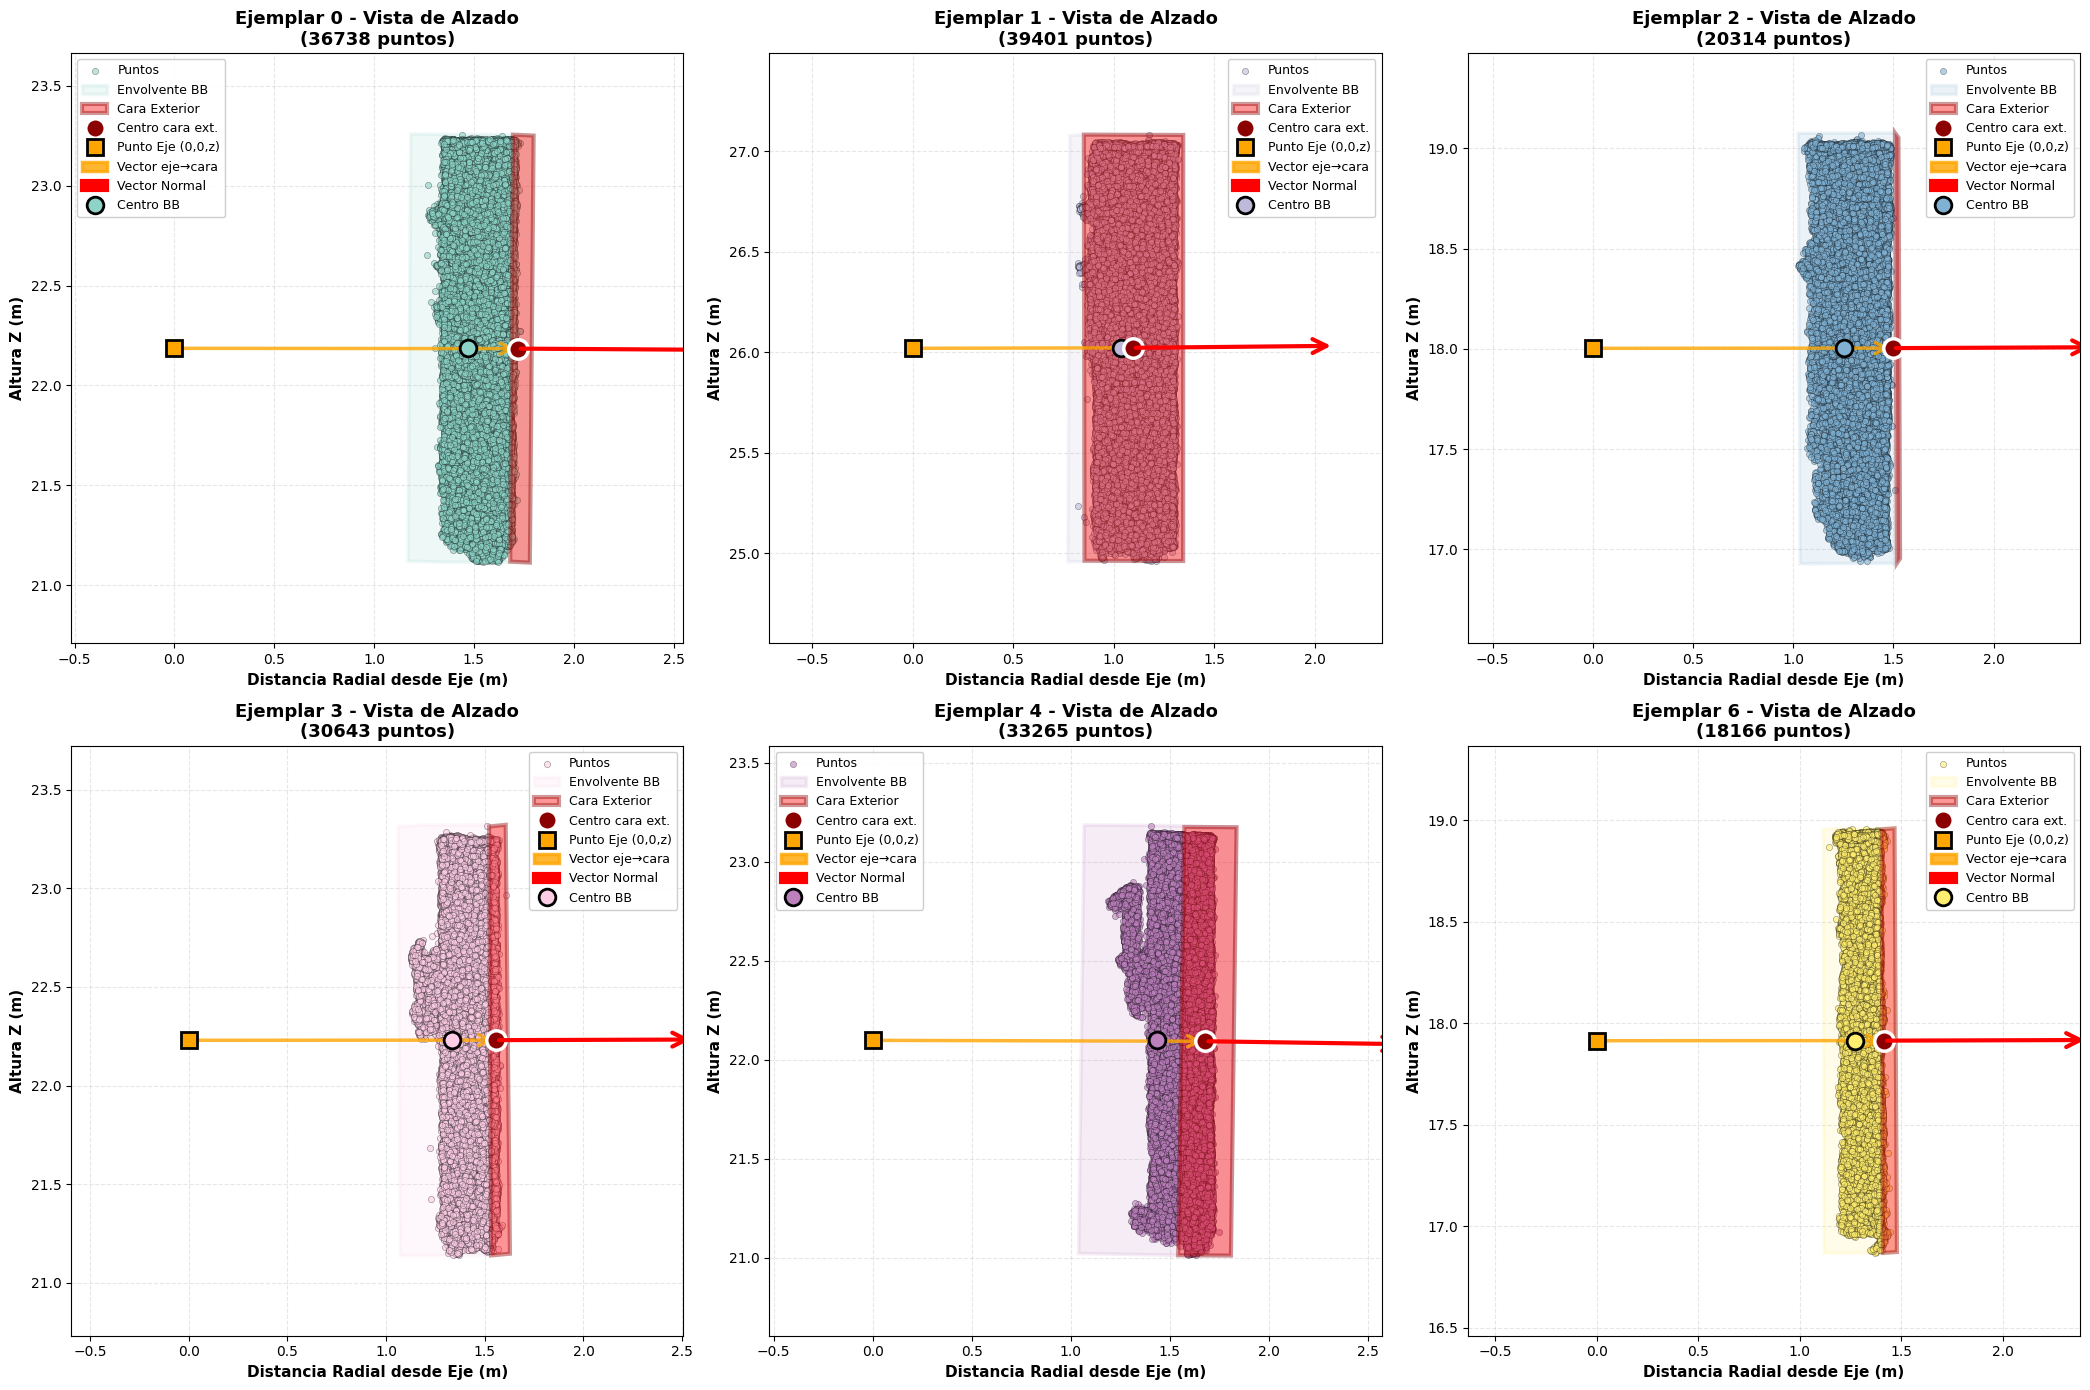

✓ Vistas de alzado generadas
✓ 6 ejemplares visualizados

NOTA: En la vista de alzado:
  - Eje horizontal = distancia radial desde el eje vertical (0,0)
  - Eje vertical = altura Z
  - La proyección 'aplana' la geometría 3D en un plano vertical


In [ ]:
# CELDA_4
"""
VISTA DE ALZADO DE ANTENAS
===========================

Genera vistas de alzado (elevación) para cada ejemplar de la familia seleccionada.
Vista desde el eje hacia la antena, mostrando altura (Z) vs distancia radial.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Polygon as mpl_Polygon

print("\n" + "=" * 60)
print("GENERANDO VISTAS DE ALZADO POR EJEMPLAR")
print("=" * 60)
print("\nVista de Alzado: Proyección en plano vertical radial")
print("  - Eje vertical: Z (altura)")
print("  - Eje horizontal: distancia radial desde el eje (0,0)")
print("")

# Obtener lista de ejemplares
ejemplares = list(resultados_ejemplares.keys())
n_ejemplares = len(ejemplares)

# Calcular grid para subplots
n_cols = min(3, n_ejemplares)
n_rows = int(np.ceil(n_ejemplares / n_cols))

# Crear figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 7*n_rows))
if n_ejemplares == 1:
    axes = np.array([axes])
axes = axes.flatten()

# Colores para cada ejemplar
colores = plt.cm.Set3(np.linspace(0, 1, n_ejemplares))

for idx, (ejemplar, datos) in enumerate(resultados_ejemplares.items()):
    ax = axes[idx]
    color = colores[idx]

    # ========================================================================
    # 1. PROYECCIÓN DE PUNTOS EN ALZADO
    # ========================================================================

    puntos = datos['puntos_limpios']

    # Calcular distancia radial desde el eje (0,0) para cada punto
    distancia_radial = np.sqrt(puntos[:, 0]**2 + puntos[:, 1]**2)
    altura_z = puntos[:, 2]

    # Dibujar puntos
    ax.scatter(distancia_radial, altura_z, c=[color], s=20, alpha=0.6,
              edgecolors='black', linewidth=0.3, label='Puntos', zorder=3)

    # ========================================================================
    # 2. PROYECCIÓN DEL BOUNDING BOX EN ALZADO
    # ========================================================================

    vertices = datos['vertices']

    # Calcular distancia radial y Z de cada vértice
    vertices_radial = np.sqrt(vertices[:, 0]**2 + vertices[:, 1]**2)
    vertices_z = vertices[:, 2]
    vertices_alzado = np.column_stack([vertices_radial, vertices_z])

    # Encontrar la envolvente convexa de los vértices proyectados
    from scipy.spatial import ConvexHull
    try:
        hull = ConvexHull(vertices_alzado)
        hull_vertices = vertices_alzado[hull.vertices]

        # Ordenar por ángulo para dibujar el polígono correctamente
        centro_hull = np.mean(hull_vertices, axis=0)
        angulos = np.arctan2(hull_vertices[:, 1] - centro_hull[1],
                            hull_vertices[:, 0] - centro_hull[0])
        orden = np.argsort(angulos)
        hull_vertices_ordenados = hull_vertices[orden]

        # Dibujar envolvente del BB
        polygon = mpl_Polygon(hull_vertices_ordenados, fill=True, alpha=0.15,
                             facecolor=color, edgecolor=color, linewidth=2.5,
                             label='Envolvente BB', zorder=2)
        ax.add_patch(polygon)
    except:
        # Si falla la envolvente convexa, dibujar solo los vértices
        ax.scatter(vertices_radial, vertices_z, c=[color], s=50, marker='s',
                  edgecolors='black', linewidth=1.5, alpha=0.7, zorder=2)

    # ========================================================================
    # 3. CARA EXTERIOR EN ALZADO
    # ========================================================================

    cara = datos['cara_exterior']
    centro_cara = cara['centro_global']
    normal = cara['normal_global']
    vertices_cara_3d = cara['vertices_cara']

    # Proyectar vértices de la cara exterior en alzado
    vertices_cara_radial = np.sqrt(vertices_cara_3d[:, 0]**2 + vertices_cara_3d[:, 1]**2)
    vertices_cara_z = vertices_cara_3d[:, 2]
    vertices_cara_alzado = np.column_stack([vertices_cara_radial, vertices_cara_z])

    # Ordenar vértices para formar polígono
    centro_cara_alzado_temp = np.mean(vertices_cara_alzado, axis=0)
    angulos_cara = np.arctan2(vertices_cara_alzado[:, 1] - centro_cara_alzado_temp[1],
                              vertices_cara_alzado[:, 0] - centro_cara_alzado_temp[0])
    orden_cara = np.argsort(angulos_cara)
    vertices_cara_alzado_ordenados = vertices_cara_alzado[orden_cara]

    # Dibujar cara exterior rellena
    cara_poly = mpl_Polygon(vertices_cara_alzado_ordenados, fill=True, alpha=0.4,
                           facecolor='red', edgecolor='darkred', linewidth=3,
                           label='Cara Exterior', zorder=5)
    ax.add_patch(cara_poly)

    # ========================================================================
    # 4. CENTRO DE LA CARA EXTERIOR
    # ========================================================================

    centro_cara_radial = np.sqrt(centro_cara[0]**2 + centro_cara[1]**2)
    centro_cara_z = centro_cara[2]

    ax.plot(centro_cara_radial, centro_cara_z, 'o', color='darkred',
           markersize=14, markeredgecolor='white', markeredgewidth=2.5,
           label='Centro cara ext.', zorder=8)

    # ========================================================================
    # 5. PUNTO DEL EJE (0,0,z)
    # ========================================================================

    punto_eje = cara['punto_eje_ref']
    punto_eje_radial = 0  # Está en el eje (distancia radial = 0)
    punto_eje_z = punto_eje[2]

    ax.plot(punto_eje_radial, punto_eje_z, 's', color='orange',
           markersize=12, markeredgecolor='black', markeredgewidth=2,
           label='Punto Eje (0,0,z)', zorder=7)

    # ========================================================================
    # 6. VECTOR: EJE → CENTRO CARA (proyección en alzado)
    # ========================================================================

    # Este vector en alzado va desde (0, z_eje) hasta (r_cara, z_cara)
    arrow_eje_cara = FancyArrowPatch(
        (punto_eje_radial, punto_eje_z),
        (centro_cara_radial, centro_cara_z),
        arrowstyle='->', mutation_scale=20, linewidth=2.5,
        color='orange', alpha=0.8, zorder=6,
        label='Vector eje→cara'
    )
    ax.add_patch(arrow_eje_cara)

    # ========================================================================
    # 7. VECTOR NORMAL (proyección en alzado)
    # ========================================================================

    # El vector normal en 3D tiene componentes (nx, ny, nz)
    # En alzado radial, necesitamos proyectarlo al plano radial-vertical

    # Componente radial del normal (hacia fuera desde el eje)
    normal_radial = np.sqrt(normal[0]**2 + normal[1]**2)

    # Si el vector normal apunta hacia el eje (radialmente hacia dentro), invertir
    # Esto se detecta si el dot product del normal con el vector desde eje a cara es negativo
    vec_eje_a_cara = np.array([centro_cara[0], centro_cara[1], 0])
    normal_horizontal = np.array([normal[0], normal[1], 0])
    if np.dot(normal_horizontal, vec_eje_a_cara) < 0:
        normal_radial = -normal_radial

    normal_z = normal[2]

    # Escalar para visualización
    escala_vector = 1.0
    vector_end_radial = centro_cara_radial + normal_radial * escala_vector
    vector_end_z = centro_cara_z + normal_z * escala_vector

    arrow_normal = FancyArrowPatch(
        (centro_cara_radial, centro_cara_z),
        (vector_end_radial, vector_end_z),
        arrowstyle='->', mutation_scale=25, linewidth=3,
        color='red', zorder=10, label='Vector Normal'
    )
    ax.add_patch(arrow_normal)

    # ========================================================================
    # 8. CENTRO DEL BB
    # ========================================================================

    centro_bb = datos['bb_info']['centro']
    centro_bb_radial = np.sqrt(centro_bb[0]**2 + centro_bb[1]**2)
    centro_bb_z = centro_bb[2]

    ax.plot(centro_bb_radial, centro_bb_z, 'o', color=color,
           markersize=12, markeredgecolor='black', markeredgewidth=2,
           label='Centro BB', zorder=6)

    # ========================================================================
    # CONFIGURACIÓN DEL GRÁFICO
    # ========================================================================

    ax.set_xlabel('Distancia Radial desde Eje (m)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Altura Z (m)', fontsize=11, fontweight='bold')
    ax.set_title(f'Ejemplar {int(ejemplar)} - Vista de Alzado\n({len(puntos)} puntos)',
                fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='best', fontsize=9, framealpha=0.95)

    # Establecer aspecto igual para que las proporciones sean correctas
    ax.set_aspect('equal', adjustable='datalim')

    # Límites con margen
    margen = 0.5
    ax.set_xlim(-0.2, max(distancia_radial) + margen)
    ax.set_ylim(altura_z.min() - margen, altura_z.max() + margen)

# Ocultar subplots vacíos
for idx in range(n_ejemplares, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("✓ Vistas de alzado generadas")
print(f"✓ {n_ejemplares} ejemplares visualizados")
print("\nNOTA: En la vista de alzado:")
print("  - Eje horizontal = distancia radial desde el eje vertical (0,0)")
print("  - Eje vertical = altura Z")
print("  - La proyección 'aplana' la geometría 3D en un plano vertical")